<a href="https://colab.research.google.com/github/Albina1310/Albina1310/blob/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%BE%D0%BD%D0%BB%D0%B0%D0%B9%D0%BD_%D0%BC%D0%B0%D0%B3%D0%B0%D0%B7%D0%B8%D0%BD%D0%B0_%D0%B2_%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B8_%D1%82%D0%BE%D0%B2%D0%B0%D1%80%D0%BE%D0%B2_%22%D0%9A%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D1%8B_%D0%B8_%D0%BC%D0%BE%D0%BD%D0%BE%D0%B1%D0%BB%D0%BE%D0%BA%D0%B8%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ данных о товарах категории "Компьютеры и моноблоки" онлайн-магазина

**Задача: установить в имеющихся данных, какие характеристики влияют на размер цены и на популярность персональных компьютеров, выкладываемых на онлайн-площадках.**

Предоставлены данные одного из онлайн-магазина, категории "Компьютеры и моноблоки", где находится следующая информация:
- product_id - индетефикатор товара
- title - название товара
-	price - цена в рублях
-	sales	- количество проданного товара
- feedbacks	- количество отзывов о товаре
- seller - наименование продавца
- seller_rating	- рейтинг продавца
- Процессор	- название и количество ядер в нем
- Оперативная память - название и объем памяти
- Жесткий диск
- Видеопроцессор
- Операционная система
- Гарантийный срок
- Страна производства
- Габариты товара	- ширина, высота, глубина и вес
- Габариты товара (с упаковкой)

План действий:
1. Открыть файл и посмотреть информацию по данным
2. Сделать обработку - "чистку" данных
3. Провести анализ:
- технических характеристик для выявления зависимсости цены от них;
- популярных пк на рынке и их параметров
4. Общий вывод.


# Откроем данные

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats as st
from plotly import graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import math as mth
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
import json
pd.set_option('display.max_columns', 0)
from folium import Map, Choropleth, Marker
from folium.plugins import MarkerCluster

In [ ]:
!gdown --id 1Syp23O8PqV7VSwG0_aOq5p9QlT3OMmfC

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Syp23O8PqV7VSwG0_aOq5p9QlT3OMmfC
To: /content/final_task.csv
100% 3.97M/3.97M [00:00<00:00, 22.2MB/s]


In [ ]:
data = pd.read_csv('final_task.csv')

In [ ]:
# посмотрим таблицу
display(data.head())

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [ ]:
# посмотрим размеры таблицы
data.shape

(4500, 16)

In [ ]:
# посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   product_id                     4500 non-null   int64  
 1   title                          4500 non-null   object 
 2   price                          4499 non-null   object 
 3   sales                          1164 non-null   object 
 4   feedbacks                      4500 non-null   object 
 5   seller                         4391 non-null   object 
 6   seller_rating                  4389 non-null   float64
 7   Процессор                      4500 non-null   object 
 8   Оперативная память             4500 non-null   object 
 9   Жесткий диск                   4500 non-null   object 
 10  Видеопроцессор                 4500 non-null   object 
 11  Операционная система           4500 non-null   object 
 12  Гарантийный срок               2648 non-null   o

Открыв файл мы обнаружили следующие проблемы:

- Наименование столбцов не в едином стиле - надо переименовать их
- Наличие незаполненных значений - пропуски (в каком количестве и в каких столбцах проверим дальше в процессе предобработки данных)
- Наличие вложенных значений (словарей по признакам 'Процессор',	'Оперативная память',	'Жесткий диск', 'Габариты товара')
- столуц 'Габариты товара (с упаковкой)' удалим из таблицы - они не несут необходимой информации - он не являются  комплектующими, которое могут повлиять на цену товара.
- Приведение признаков в необходимый формат (в int: 'price', 'sales', 'feedbacks', 'Гарантийный срок')
- Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

**Вывод**: в данных есть 4500 строк и 16 столбцов. Данные в некоторых столбцах закодированны и их придется распаковать. Есть пропуски , возможно и полные дубликаты. Необходима обработка данных.

# Проведем обработку данных

## Первичная предобработка данных

In [ ]:
# создадим копию датафрейма, так как исходные данные могут нам пригодиться
df = data.copy()

In [ ]:
# проверяем на количество пропусков и дубликатов
print(f'Количество пропусков в таблице:\n{df.isna().sum()}')
print()
print(f'Количество дубликатов в таблице: {df.duplicated().sum()}')

Количество пропусков в таблице:
product_id                          0
title                               0
price                               1
sales                            3336
feedbacks                           0
seller                            109
seller_rating                     111
Процессор                           0
Оперативная память                  0
Жесткий диск                        0
Видеопроцессор                      0
Операционная система                0
Гарантийный срок                 1852
Страна производства              1889
Габариты товара                     0
Габариты товара (с упаковкой)       0
dtype: int64

Количество дубликатов в таблице: 490


Обзор пропущенных значений по признакам:

- 'price' - один пропуск в цене, убирем его, так как без этого ключевого показателя нам не интересен товар.
- 'sales ' - пропуски в количестве проданных товаров. Возможно данные пропуски связаны тем, что магазины не проводили учет и возможно только начали его проводить. Пропуски заполнить нечем, поэтому оставим их.
- 'seller' - пропуски в наименовании продавца. Здесь нет возможности заполнить, поэтому оставим их.
- 'seller_rating' - пропуски в рейтинге продавца. Здесь нет возможности заполнить, поэтому оставим их.
- 'Гарантийный срок ' - пропуски связаны с тем, что продавцы не указали полных характеристик товара или он просто отсутствует. Заполнить их мы не можем, оставим как есть.
- 'Страна производства' - пропуски также связаны с нежеланием продавца раскрывать всю информацию о товаре. Заполнить их нет возможности, оставим.

In [ ]:
# удалим столбец 'Габариты товара (с упаковкой)' - этот параметр не относится к анализу - он нужен для расчета доставки.
df = df.drop(columns = 'Габариты товара (с упаковкой)')

In [ ]:
# уберем пропуск (1) в столбце 'price'
df.dropna(subset=['price'], inplace=True)

In [ ]:
# удалим явные, полные дубликаты
df = df.drop_duplicates().reset_index(drop=True)

In [ ]:
# сколько данных было убрано в процентах
print(round((data.shape[0] - df.shape[0])*100/data.shape[0], 2),'% данных было убрано')

10.91 % данных было убрано


In [ ]:
# переименуем столбцы для удобного анализа и понимания их значений
df = df.rename(columns = {
    'product_id': 'id',
    'Процессор': 'processor',
    'Оперативная память': 'memory',
    'Жесткий диск': 'hard_drive',
    'Видеопроцессор': 'video_processor',
    'Операционная система': 'operating_system',
    'Гарантийный срок':'warranty_period',
    'Страна производства': 'country',
    'Габариты товара': 'dimensions',
    'Габариты товара (с упаковкой)':'dimensions_with_packaging'})

In [ ]:
# контроль размеров датафрейма
df.shape

(4009, 15)

In [ ]:
# посмотрим после первичной обработки на таблицу
df.head()

,id,title,price,sales,feedbacks,seller,seller_rating,processor,memory,hard_drive,video_processor,operating_system,warranty_period,country,dimensions
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10805₽,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме..."
1,17877962,Системный блок,32900₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35720₽,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39237₽,Купили более 10 раз,1 отзыв,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76188₽,Купили более 200 раз,94 отзыва,Robotcomp,4.7,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета..."


**Вывод**: здесь мы посмотрели где и в каком количестве пропуски. Убрали одну строку с пропуском в цене товара, а также 490 полных дубликата. Итого убрано почти 11% данных - достаточно много, но они будут мешать и искажать анализ, поэтому было принято такое решение. Привели названия колонок в единый строчный стиль на английский язык, для понятного и удобного чтения и понимания. Далее распакуем словари и приведем данные в нужный тип.

## Работа с вложенными значениями - словарями (распаковка)

### распакуем 'processor'

In [ ]:
# обзор значений по признаку
df['processor'][0]

"{'Процессор_тип': 'Intel Celeron', 'Количество ядер процессора': '2'}"

In [ ]:
# пробуем достать значение по ключу 'Процессор_тип'
json.loads(df['processor'][0].replace("'", '"'))['Процессор_тип']

'Intel Celeron'

In [ ]:
# код отработал корректно
# пишем функцию для последующего применения к столбцу, при этом вычленяя Процесоор_тип
def processor_type(text):
  result = json.loads(text.replace("'", '"'))['Процессор_тип']
  return result

In [ ]:
# применяем функцию к новому столбцу 'processor_type'
df['processor_type'] = df['processor'].apply(processor_type)

In [ ]:
# контроль результата
df.processor_type

0       Intel Celeron
1       Intel Core i5
2        не заполнено
3       Intel Core i5
4       Intel Core i5
            ...      
4004    Intel Core i5
4005    Intel Core i5
4006    Intel Core i5
4007    Intel Core i5
4008    Intel Core i5
Name: processor_type, Length: 4009, dtype: object

In [ ]:
# посмотрим уникальные значения получившегося столбца и их количество
print(df['processor_type'].unique())
print()
print('Всего уникальных значений типов процессора -', df['processor_type'].nunique())

['Intel Celeron' 'Intel Core i5' 'не заполнено' 'Intel Core i3'
 'AMD Ryzen 5' 'AMD Athlon' 'Intel Core i7' 'Intel Core i9' 'AMD Ryzen 3'
 'Gemini Lake Refresh J4115' 'Gemini Lake Refresh J4125'
 'Intel Core 12400F' 'Gemini Lake Refresh Processor J4125' 'Intel Pentium'
 'Intel J4125' 'Intel' 'Intel Xeon' '6010' 'AMD Ryzen 7' '12400f' 'AMD A6'
 '8 ядер' 'Intel J3455' 'N3350' '4 ядра intel' 'Intel 4 ядра'
 'Intel Atom x5-Z8500' 'AMD A12-9800E' 'Intel Atom N280 (1.6 ГГц)'
 'Intel Apollo Lake J3355 Dual-Core (2 ГГц)' 'AMD E1-6010' 'Intel N5095'
 'AMD RYZEN 4600g Vega7 арт. 100343717' 'Intel Processor N5095'
 'Встроенный intel J3160 - core 1.5 ГГц'
 'Intel Z8350 4 ядра 1,92 ГГц 64 бита' 'Intel N5105' 'AMD Ryzen 6'
 'AMD RYZEN 4600g Vega7 арт. 143553804'
 'Intel Atom DualCore D2550 Cedar Trail' 'AMD Ryzen 9' 'A10-5800KRAM'
 'AMD FX-4300' 'AMD FX-6100' 'Intеl Quad Q9400' 'Intеl Quad 9400'
 'Intel E5' 'Intel Core Quad 9400' 'Intel E3' 'AMD Radeon RX 570' 'Q9400'
 'Intеl Quad' 'Ryzen; 3 1300x' 

Много разновидностей типов процессора. Найдены повторяющиеся названия процессоров,только написаны в разном размере букв, так 'Intel Core i 5 10400f'  с заглавной буквы, а 'intel core i 5 10400f' с маленькой. Чтобы данную ошибку исключить, сделаем все названия в едином строчном виде.

In [ ]:
# сделаем названия типов процессора в нижнем регистре
df['processor_type'] = df['processor_type'].str.lower()

# еще раз посмотрим, какие значения остались и их количество
print(df['processor_type'].unique())
print()
print('Всего уникальных значений типов процессора -', df['processor_type'].nunique())

['intel celeron' 'intel core i5' 'не заполнено' 'intel core i3'
 'amd ryzen 5' 'amd athlon' 'intel core i7' 'intel core i9' 'amd ryzen 3'
 'gemini lake refresh j4115' 'gemini lake refresh j4125'
 'intel core 12400f' 'gemini lake refresh processor j4125' 'intel pentium'
 'intel j4125' 'intel' 'intel xeon' '6010' 'amd ryzen 7' '12400f' 'amd a6'
 '8 ядер' 'intel j3455' 'n3350' '4 ядра intel' 'intel 4 ядра'
 'intel atom x5-z8500' 'amd a12-9800e' 'intel atom n280 (1.6 ггц)'
 'intel apollo lake j3355 dual-core (2 ггц)' 'amd e1-6010' 'intel n5095'
 'amd ryzen 4600g vega7 арт. 100343717' 'intel processor n5095'
 'встроенный intel j3160 - core 1.5 ггц'
 'intel z8350 4 ядра 1,92 ггц 64 бита' 'intel n5105' 'amd ryzen 6'
 'amd ryzen 4600g vega7 арт. 143553804'
 'intel atom dualcore d2550 cedar trail' 'amd ryzen 9' 'a10-5800kram'
 'amd fx-4300' 'amd fx-6100' 'intеl quad q9400' 'intеl quad 9400'
 'intel e5' 'intel core quad 9400' 'intel e3' 'amd radeon rx 570' 'q9400'
 'intеl quad' 'ryzen; 3 1300x' 

Осталось 61 из 63 значений. Теперь более наглядно стало и видно, что есть названия написанные по разному, так: '4 ядра intel' и 'intel 4 ядра', так же есть названия не понятные к чему их относить, например : '8 ядер'. Преобразуем названия, которые понятны в единый формат.

In [ ]:
# неявные дубликаты уберем
df = df.replace({'processor_type':{'gemini lake refresh processor j4125': 'gemini lake refresh j4125',
                                   '4 ядра intel': 'intel 4 ядра',
                                   'intel processor n5095': 'intel n5095',
                                   'q9400': 'intel core q9400',
                                   'intеl quad q9400': 'intel core q9400',
                                   'intеl quad 9400': 'intel core q9400',
                                   'intel core quad 9400': 'intel core q9400',
                                   'cortex-a53': 'arm cortex-a53',
                                   'amd ryzen 4600g vega7 арт. 100343717': 'amd ryzen 4600g vega7',
                                   'amd ryzen 4600g vega7 арт. 143553804': 'amd ryzen 4600g vega7',
                                   'intel core i 3 10100f': 'intel core i3',
                                   'ryzen; 3 1300x':'amd ryzen 3',
                                   'intel core i 5 10400f': 'intel core i5',
                                   'amd рязань 5 4650': 'amd ryzen 5',
                                   'amd рязань 5 5600x': 'amd ryzen 5',
                                   'не заполнено': np.NAN}})

In [ ]:
# посмотрим сколько осталось
print('Всего уникальных значений типов процессора -', df['processor_type'].nunique())

Всего уникальных значений типов процессора - 47


In [ ]:
# посмотрим количество каждого типа процессора, может мы упустили еще неявные дубликаты
df['processor_type'].value_counts()

intel core i5                                1162
intel core i7                                 699
intel core i3                                 522
amd ryzen 5                                   498
amd athlon                                    121
intel xeon                                     77
amd ryzen 7                                    71
amd ryzen 3                                    52
amd a6                                         47
intel pentium                                  39
intel celeron                                  27
intel e5                                       22
intel n5095                                    16
intel                                          14
intel core i9                                  14
intеl quad                                     13
intel e3                                       12
intel z8350 4 ядра 1,92 ггц 64 бита            12
gemini lake refresh j4125                       9
apple m1                                        7


Все , что меньше 10 по количеству мы не будем брать в расчет при анализе влияния на цену, поэтому углубляться дальше нет смысла. Мы уже видим из 47 уникальных значений выбивается пятерка лидеров, их далее и будем анализировать.

In [ ]:
# достанем значение по ключу 'Количество ядер процессора', создав функцию под нее
def processor_cores(text):
  result = json.loads(text.replace("'", '"'))['Количество ядер процессора']
  return result

In [ ]:
# применяем функцию к новому столбцу 'processor_cores'
df['processor_cores'] = df['processor'].apply(processor_cores)
df['processor_cores']

0                  2
1       не заполнено
2       не заполнено
3                  6
4                  6
            ...     
4004               6
4005               6
4006               6
4007               6
4008               6
Name: processor_cores, Length: 4009, dtype: object

In [ ]:
# посмотрим уникальные значения получившегося столбца и их количество
print(df['processor_cores'].unique())
print()
print('Всего уникальных значений типов процессора -', df['processor_cores'].nunique())

['2' 'не заполнено' '6' '10' '4' '12' '16' '4 ядра' '8' '2 ядра' '6 ядер'
 '2 шт' '8 Ядер 16 потоков' '1' '8 ядер' '14' '20' '24 ядра']

Всего уникальных значений типов процессора - 18


In [ ]:
# уберем неявные дубликаты
df = df.replace({'processor_cores':{'4 ядра': '4', '2 ядра': '2', '6 ядер':'6', '2 шт': '2', '8 ядер': '8', '24 ядра': '24', '8 Ядер 16 потоков': '8', 'не заполнено': np.NAN}})

In [ ]:
# приведем нашу колонку сразу в нужный нам тип "int"
df['processor_cores'] = df['processor_cores'].astype('Int64')

In [ ]:
# посмотрим что получилось
df['processor_cores'].value_counts()

6     1468
4      823
8      438
2      299
12     284
10     130
24      60
16      48
14       7
20       7
1        1
Name: processor_cores, dtype: Int64

Видим, что появилось 6 лидеров из 11 оставшихся и дубликатов неявных нет.

In [ ]:
# уберем столбец "processor",  так как мы его распаковали - он нам уже не нужен
df = df.drop(columns = 'processor')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4009 non-null   int64  
 1   title             4009 non-null   object 
 2   price             4009 non-null   object 
 3   sales             1034 non-null   object 
 4   feedbacks         4009 non-null   object 
 5   seller            3913 non-null   object 
 6   seller_rating     3912 non-null   float64
 7   memory            4009 non-null   object 
 8   hard_drive        4009 non-null   object 
 9   video_processor   4009 non-null   object 
 10  operating_system  4009 non-null   object 
 11  warranty_period   2365 non-null   object 
 12  country           2324 non-null   object 
 13  dimensions        4009 non-null   object 
 14  processor_type    3491 non-null   object 
 15  processor_cores   3565 non-null   Int64  
dtypes: Int64(1), float64(1), int64(1), object(

**Итог:** распаковав значения по ключу "Процессор_тип" мы обнаружили 47 уникальных значений, а по ключу "Количество ядер" получилось 11 значений. Также обнаружили что есть значения среди них, которые занимают лидирующие позиции и в дальнейшем будем анализировать их.Видим, что код отработал корректно и все на месте: столбцы processor_type, processor_cores добавились.

### распакуем 'memory'

In [ ]:
# приведем значение в словарь с помощью функции eval()
eval(df['memory'][0])

{'Тип оперативной памяти': 'DDR 3', 'Объем оперативной памяти (Гб)': '4 ГБ'}

In [ ]:
# применим функцию к новому столбцу 'type_of_RAM' вытащив значения по ключу 'Тип оперативной памяти' из столбца 'memory'
df['type_of_RAM'] = df['memory'].apply(lambda x: eval(x)['Тип оперативной памяти'])

Успешно вставили столбец. Теперь посмотрим уникальные значения, для выявления неявных дубликатов.

In [ ]:
# уникальные значения и их количество по признаку 'type_of_RAM'
print(df['type_of_RAM'].unique())
print()
print('Всего уникальных значений - Тип оперативной памяти -', df['type_of_RAM'].nunique())

['DDR 3' 'не заполнено' 'DDR 4' 'DDR' 'DDR 5' 'SODDIM' '4Gb' '16' '16 Гб'
 '4GB' 'RAM 16 ГБ']

Всего уникальных значений - Тип оперативной памяти - 11


In [ ]:
# посмотрим распределение значений по их количеству
df['type_of_RAM'].value_counts()

DDR 4           3134
не заполнено     517
DDR 3            335
DDR 5             14
4Gb                2
16                 2
DDR                1
SODDIM             1
16 Гб              1
4GB                1
RAM 16 ГБ          1
Name: type_of_RAM, dtype: int64

То что написано в гб - это обьем памяти, а не тип, то есть некоторые значения заполнены не корректно . Единичные значения брать в расчет не будем и уберать тоже. Мы видим однозначного лидера. Оставим пока данные как есть.

In [ ]:
# применим функцию к новому столбцу 'amount_of_RAM' и вытащим значение по ключу 'Объем оперативной памяти (Гб)' из столбца 'memory'
df['amount_of_RAM'] = df['memory'].apply(lambda x: eval(x)['Объем оперативной памяти (Гб)'])

In [ ]:
# уникальные значения и их количество по признаку 'amount_of_RAM'
print(df['amount_of_RAM'].unique())
print()
print('Всего уникальных значений - Объем оперативной памяти -', df['amount_of_RAM'].nunique())

['4 ГБ' '16 ГБ' '8' '16' '32' '6 ГБ' '8 ГБ' None '32 ГБ' '4' '16 гб'
 '16ГБ' '8 гб' '8 GB' '64' '4 гб' '8Гб' '2 ГБ' '240 гб' '2' '6' '8Gb'
 '8 Гб' '64 ГБ' '32 гб' '64 гб' '16 gb' '16 Гб' '4 GB' '1000 гб' '1'
 '16 Gb']

Всего уникальных значений - Объем оперативной памяти - 31


Видим, что есть неявные дубликаты из-за того, что значения по разному записаны: на русском и на английском, с маленькой и с большой буквы, слитно и через пробел. Чтобы привести в единый формат, создадим функцию, которая уберет буквы и оставит только цифры.

In [ ]:
# для начала протестируем на одном значениии '8Гб' и сохраним его в "х"
х = '8Гб'
splited_х = х.split()
clean_х = ''.join(splited_х[:-1])
print(clean_х)

In [ ]:
# импортируем библиотеку и используем функцию re.sub - убирает буквы в строке
import re
clean_х = re.sub('\D', '', х)
print(clean_х)

8


In [ ]:
# создали функцию
def clear_х(х):
  return re.sub('\D', '', str (х))

In [ ]:
# работает корректно функция
clear_х(х)

'8'

In [ ]:
# применим ее к столбцу
df['amount_of_RAM'] = df['amount_of_RAM'].apply(clear_х)

In [ ]:
# посмотрим сколько осталось уникальных значений
print(df['amount_of_RAM'].unique())
print()
print('Всего уникальных значений - Объем оперативной памяти -', df['amount_of_RAM'].nunique())

['4' '16' '8' '32' '6' '' '64' '2' '240' '1000' '1']

Всего уникальных значений - Объем оперативной памяти - 11


In [ ]:
# вместо ковычек (они появился, так как значение None перешло в строку и буквы вней удалились, оставив только ковычки)
# поставим пропуск
df = df.replace({'amount_of_RAM':{'': np.NAN}})

In [ ]:
# приведем данные в нужный тип - "int"
df['amount_of_RAM'] = df['amount_of_RAM'].astype('Int64')

In [ ]:
# посмотрим как распределены
df['amount_of_RAM'].value_counts()

16      2065
32       687
8        628
4        139
64        67
2         12
6          4
240        1
1000       1
1          1
Name: amount_of_RAM, dtype: Int64

Осталось 10 уникальных значений из 31. Видим, что есть значения выбивающиеся - 240, 1000, 1 - их пока не будем трогать. Видим явную 3-ку лидеров. Далее будем их анализировать.

Теперь уберем столбец "memory" - он больше не нужен нам, данные из него "вынули".

In [ ]:
# удалим столбец 'memory'
df = df.drop(columns = 'memory')

In [ ]:
# сделаем контроль наших действий
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4009 non-null   int64  
 1   title             4009 non-null   object 
 2   price             4009 non-null   object 
 3   sales             1034 non-null   object 
 4   feedbacks         4009 non-null   object 
 5   seller            3913 non-null   object 
 6   seller_rating     3912 non-null   float64
 7   hard_drive        4009 non-null   object 
 8   video_processor   4009 non-null   object 
 9   operating_system  4009 non-null   object 
 10  warranty_period   2365 non-null   object 
 11  country           2324 non-null   object 
 12  dimensions        4009 non-null   object 
 13  processor_type    3491 non-null   object 
 14  processor_cores   3565 non-null   Int64  
 15  type_of_RAM       4009 non-null   object 
 16  amount_of_RAM     3605 non-null   Int64  


**Итог:** мы распаковали столбец 'memory' по ключу "тип оперативной памяти" и выявили в нем много некорректно заполненных данных: вместо типа стоит объем. Обнаружили три названия типа памяти, но явный лидер один. Так же распаковав по ключу "Объем оперативной памяти" нашли 10 уникальных значений и из них выбивается 3 лидирующих значения. Изменением типа данных мы займемся в следующем разделе, после распаковки всех столбцов.

### распакуем "hard_drive"

In [ ]:
# приведем значение в словарь с помощью функции eval()
eval(df['hard_drive'][0])

{'Объем накопителя HDD': None, 'Объем накопителя SSD': None}

In [ ]:
# применим функцию к новому столбцу 'storage_capacity_HDD' и вытащим значения по ключу 'Объем накопителя HDD' из столбца 'hard_drive'
df['storage_capacity_HDD'] = df['hard_drive'].apply(lambda x: eval(x)['Объем накопителя HDD'])

In [ ]:
# посмотрим уникальные значения нового столбца
print(df['storage_capacity_HDD'].unique())
print()
print('Всего уникальных значений - Объем накопителя HDD -', df['storage_capacity_HDD'].nunique())

[None '1000 Гб' '2000 Гб' '1 Тб' '1 тб' '2000Gb' '1Tb' '500' 'нет' '2TB'
 '1 TB' '0' 'нет; без HDD' 'без HDD' '500 гб' '500 Gb' '1000 Gb' '3000 гб'
 '500 Гб' '1000' '2 ТБ' '512 Гб' 'Отсутствует' 'отсутствует' '1000 гб'
 '250 гб' '256 Гб' '4000 Гб; 4000' '1000GB' '500; 500 гб' '2000 гб'
 '1024 ГБ' '2 тб']

Всего уникальных значений - Объем накопителя HDD - 32


Видим, что данные в разной числовой мере, то есть и гб и тб есть. Надо привести в единый формат: переведем все в гб (1тб = 1000 гб). И неявные дубликаты уберем.

In [ ]:
# применим ранее созданную функцию, чтобы убрать буквы и оставить цифры
df['storage_capacity_HDD'] = df['storage_capacity_HDD'].apply(clear_х)

In [ ]:
# посмотрим что осталось
df['storage_capacity_HDD'].unique()

array(['', '1000', '2000', '1', '500', '2', '0', '3000', '512', '250',
       '256', '40004000', '500500', '1024'], dtype=object)

In [ ]:
# переведем тб в гб - эта цифра 1 и 2, также уберем задвоенные цифры
df = df.replace({'storage_capacity_HDD':{'1': '1000', '2':'2000', '0': np.NAN,'40004000':'4000', '500500':'500', '': np.NAN}})

In [ ]:
# приведем данные в нужный тип - "int"
df['storage_capacity_HDD'] = df['storage_capacity_HDD'].astype('Int64')

In [ ]:
# посмотрим распределение
df['storage_capacity_HDD'].value_counts()

1000    991
500     104
2000     30
512       8
1024      5
250       2
3000      1
256       1
4000      1
Name: storage_capacity_HDD, dtype: Int64

Видим, что 2 значения первых распространенные. Их рассмотрим и сделаем анализ позже.

In [ ]:
# применим функцию к новому столбцу 'storage_capacity_SSD' для извлечения значений по ключу 'Объем накопителя SSD' из столбца 'hard_drive'
df['storage_capacity_SSD'] = df['hard_drive'].apply(lambda x: eval(x)['Объем накопителя SSD'])

In [ ]:
# посмотрим уникальные значения
df['storage_capacity_SSD'] = df['storage_capacity_SSD'].str.lower()
print(df['storage_capacity_SSD'].unique())
print()
print('Всего уникальных значений - Обьем накопителя SSD -', df['storage_capacity_SSD'].nunique())

[None '256 гб' '512 гб' '480 гб' '960 гб' '2 тб' '240 гб' '1000gb pci-e'
 '128 гб' '480gb' '240gb' '120 гб' '128gb' '256gb' '120gb' '120' '512gb'
 '500gb' '960gb' '512' '256 gb' '64 гб' '256' '128' '256гб' '64 gb'
 '1000gb' '128 gb' '32 гб' '16 гб' '2 гб' '32' '480 gb' '120 gb' '240 gb'
 '512гб арт. 100343717' '1000 гб' '32gb' '64gb' '1024 гб' '250 гб' '480'
 '500 гб' '1240 гб' '1480 гб' '1 тб' '512 gb' '2000' '2000 гб' '64' '240'
 '512 гб m.2 pcie' '256 gb ssd' '512гб' '64gb/emmc' '1000'
 '512гб арт. 143553804' '1000 gb' '60 gb' '240; 240 гб' '250'
 '128; 128 гб' '500' '1500 гб' '480; 960' '1500' '256 гб; 960 гб'
 '256 гб + 1 tb' '1000гб арт. 152611584']

Всего уникальных значений - Обьем накопителя SSD - 68


Есть значения и в гб и в тб, далее мы их переведем.

In [ ]:
# переведем в гб из тб, также цифры с артикулом заменим
df = df.replace({'storage_capacity_SSD':{'2 тб': '2000 гб', '512гб арт. 100343717':'512', '1 тб':'1000 гб', '512 гб m.2 pcie':'512', '512гб арт. 143553804':'512', '240; 240 гб':'240', '128; 128 гб': '128', '480; 960': np.NAN, '256 гб + 1 tb': '1256', '256 гб; 960 гб': np.NAN, '1000гб арт. 152611584':'1000 гб'}})

In [ ]:
# применим ранее созданную функцию и уберем буквы, тем самым уйдут неявные дубликаты
df['storage_capacity_SSD'] = df['storage_capacity_SSD'].apply(clear_х)

In [ ]:
# посмотрим что получилось
print(df['storage_capacity_SSD'].unique())
print()
print('Всего уникальных значений - Обьем накопителя SSD -', df['storage_capacity_SSD'].nunique())

['' '256' '512' '480' '960' '2000' '240' '1000' '128' '120' '500' '64'
 '32' '16' '2' '1024' '250' '1240' '1480' '60' '1500' '1256']

Всего уникальных значений - Обьем накопителя SSD - 22


In [ ]:
# заменим кавычки на пропуск - они появились так как None перешел в строку, далее как буквы ее удалили
df = df.replace({'storage_capacity_SSD':{'': np.NAN}})

In [ ]:
# приведем данные в нужный тип - "int"
df['storage_capacity_SSD'] = df['storage_capacity_SSD'].astype('Int64')

In [ ]:
# посмотрим распределение
df['storage_capacity_SSD'].value_counts()

480     1085
1000     686
512      395
240      384
256      333
960      201
120      136
500      112
128       94
2000      44
64        21
250       16
1024      11
32         8
1240       6
1480       6
1500       4
16         1
2          1
60         1
1256       1
Name: storage_capacity_SSD, dtype: Int64

In [ ]:
# удалим столбец 'hard_drive'
df = df.drop(columns = 'hard_drive')

# сделаем контроль наших действий
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   object 
 3   sales                 1034 non-null   object 
 4   feedbacks             4009 non-null   object 
 5   seller                3913 non-null   object 
 6   seller_rating         3912 non-null   float64
 7   video_processor       4009 non-null   object 
 8   operating_system      4009 non-null   object 
 9   warranty_period       2365 non-null   object 
 10  country               2324 non-null   object 
 11  dimensions            4009 non-null   object 
 12  processor_type        3491 non-null   object 
 13  processor_cores       3565 non-null   Int64  
 14  type_of_RAM           4009 non-null   object 
 15  amount_of_RAM        

**Итог**: распаковали очередной столбец, тем самым у нас прибавилось два новых, а 'hard_drive' удален. Почистили данные в новых образовавшихся столбцах, где в итоге: HDD память только у трети товаров и выяснили, что из 9 уникальных значений лидирует 2, а встроенная память SSD  практически у всех и из 21 уникального значения можно выделить 5-ку лидеров. Далее продолжим распаковку по другим признакам.

### распакуем 'dimensions'

In [ ]:
# приведем значение в словарь с помощью функции eval()
eval(df['dimensions'][0])

{'Ширина предмета': '28.5 см',
 'Глубина предмета': '40 см',
 'Высота предмета': '9.6 см',
 'Вес без упаковки (кг)': '3.5 кг'}

In [ ]:
# применим функцию к новому столбцу 'width' и вытащим значение по ключу 'Ширина предмета' из столбца 'dimensions'
df['width'] = df['dimensions'].apply(lambda x: eval(x)['Ширина предмета'])

In [ ]:
# уникальные значения и их количество по признаку 'width'
print(df['width'].unique())
print()
print('Всего уникальных значений ширины товара -', df['width'].nunique())

['28.5 см' None '28 см' '20 см' '21 см' '6.1 см' '18.7 см' '11.5 см'
 '34 см' '25 см' '19 см' '53 см' '45 см' '10.2 см' '17.8 см' '22 см'
 '16.5 см' '18 см' '40 см' '13 см' '16.3 см' '5 см' '12 см' '11 см'
 '1.5 см' '0.18 см' '38 см' '17 см' '21.5 см' '35 см' '43 см' '15 см'
 '26 см' '30 см' '9.5 см' '18.2 см' '25.5 см' '21.7 см' '17.7 см' '42 см'
 '21.3 см' '10 см' '17.5 см' '10.5 см' '49 см' '23 см' '7 см' '14.5 см'
 '6 см' '11.3 см' '41.5 см' '15.5 см' '19.5 см' '8 см' '19.6 см' '37 см'
 '20.5 см' '39 см' '46 см' '19.2 см' '16 см' '17.9 см' '9.3 см' '18.5 см'
 '300 см' '60 см' '31 см' '43.5 см' '36.5 см' '30.8 см' '54.7 см' '50 см'
 '20.4 см' '27 см' '51 см']

Всего уникальных значений ширины товара - 74


In [ ]:
# заменим значения появившиеся по человеческой ошибке
df = df.replace({'width':{'0.18 см': '18 см', '300 см': '30 см'}})

# переведем в тип float
df['width'] = df['width'].str.replace('см', '').astype(float)

# посмотрим распределение
df['width'].value_counts().head(10)

20.0    608
21.0    164
45.0    146
16.5    105
22.0    104
19.5    100
40.0     76
30.0     73
18.0     58
28.0     39
Name: width, dtype: int64

Можно выделить 6 лидеров.

In [ ]:
# применим функцию к новому столбцу 'depth' и вытащим значение по ключу 'Глубина предмета' из столбца 'dimensions'
df['depth'] = df['dimensions'].apply(lambda x: eval(x)['Глубина предмета'])

In [ ]:
# уникальные значения и их количество по признаку 'depth'
print(df['depth'].unique())
print()
print('Всего уникальных значений глубины товара -', df['depth'].nunique())

['40 см' None '58 см' '44 см' '45 см' '39 см' '37 см' '34 см' '42 см'
 '46 см' '43 см' '6.1 см' '14 см' '10.2 см' '10 см' '50 см' '33 см'
 '23 см' '27 см' '4.3 см' '17.8 см' '35 см' '30.5 см' '25 см' '26 см'
 '12 см' '49 см' '38 см' '0.37 см' '22 см' '11.5 см' '27.5 см' '30 см'
 '32 см' '3 см' '32.5 см' '4.4 см' '21.3 см' '17.5 см' '28.3 см' '19 см'
 '31 см' '26.5 см' '37.5 см' '2 см' '40.3 см' '39.5 см' '42.8 см' '16 см'
 '47 см' '20 см' '29.2 см' '7 см' '5 см' '12.4 см' '21.5 см' '32.6 см'
 '29 см' '22.5 см' '25.5 см' '21 см' '35.5 см' '39.6 см' '30.51 см'
 '10.6 см' '5.3 см' '18.2 см' '29.8 см' '18 см' '31.5 см' '300 см'
 '12.6 см' '53 см' '20.1 см' '33.5 см' '28.03 см' '42.5 см' '34.5 см'
 '14.7 см' '36.9 см' '60 см' '54 см' '51 см']

Всего уникальных значений глубины товара - 82


In [ ]:
# заменим некоторые значения появившиеся по человеческой ошибке
df = df.replace({'depth':{'0.37 см':'37 см', '300 см': '30 см'}})

# переведем в тип float
df['depth'] = df['depth'].str.replace('см', '').astype(float)

# посмотрим распределение
df['depth'].value_counts().head(10)

40.0    371
27.0    144
34.0    132
30.0    126
42.0    125
32.6     99
26.5     99
37.0     77
44.0     56
45.0     53
Name: depth, dtype: int64

Можно выделить 5 лидеров.

In [ ]:
# применим функцию к новому столбцу 'height' и вытащим значение по ключу 'Высота предмета' из столбца 'dimensions'
df['height'] = df['dimensions'].apply(lambda x: eval(x)['Высота предмета'])

In [ ]:
# уникальные значения и их количество по признаку 'height'
print(df['height'].unique())
print()
print('Всего уникальных значений высоты товара -', df['height'].nunique())

['9.6 см' None '58 см' '45 см' '46 см' '43 см' '39 см' '47 см' '4.3 см'
 '3.3 см' '5 см' '40 см' '44 см' '57 см' '48 см' '11.5 см' '3.4 см'
 '38.5 см' '36.8 см' '35.2 см' '35 см' '37 см' '30 см' '32 см' '12 см'
 '42 см' '10 см' '1 см' '0.37 см' '19.9 см' '13 см' '20 см' '9 см' '19 см'
 '8 см' '36 см' '28.5 см' '35.3 см' '22.2 см' '6.5 см' '6.1 см' '7.3 см'
 '47.5 см' '4.1 см' '42.7 см' '49.5 см' '39.2 см' '45.9 см' '30.5 см'
 '33 см' '36.5 см' '3 см' '15 см' '29.5 см' '49 см' '15.5 см' '50 см'
 '39.8 см' '38 см' '43.2 см' '41 см' '23 см' '41.1 см' '18 см' '44.5 см'
 '4 см' '34 см' '3.2 см' '27.2 см' '3.65 см' '2 см' '7 см' '28 см' '29 см'
 '88 см' '300 см' '52 см' '25 см' '52.7 см' '40.05 см' '42.2 см' '87 см'
 '55 см' '46.1 см' '60 см' '44.6 см' '51 см' '53 см' '33.7 см']

Всего уникальных значений высоты товара - 88


In [ ]:
# заменим некоторые значения,появившиеся по человеческой ошибке
df = df.replace({'height':{'0.37 см': '37 см', '300 см':'30 см'}})

# переведем в тип float
df['height'] = df['height'].str.replace('см', '').astype(float)

# посмотрим распределение
df['height'].value_counts().head(10)

45.0    255
35.0    179
48.0    177
39.0    158
46.0    153
30.0    139
39.8     99
43.0     88
50.0     82
40.0     82
Name: height, dtype: int64

Можно выделить 6 лидирующих значений.

In [ ]:
# применим функцию к новому столбцу 'weight' и вытащим значение по ключу 'Вес без упаковки (кг)' из столбца 'dimensions'
df['weight'] = df['dimensions'].apply(lambda x: eval(x)['Вес без упаковки (кг)'])

In [ ]:
# уникальные значения и их количество по признаку 'weight'
print(df['weight'].unique())
print()
print('Всего уникальных значений веса товара -', df['weight'].nunique())

['3.5 кг' None '7 кг' '9 кг' '11 кг' '0.49 кг' '0.27 кг' '8 кг' '2 кг'
 '5 кг' '4.5 кг' '6 кг' '6.5 кг' '0.05 кг' '0.01 кг' '4 кг' '0.61 кг'
 '0.2 кг' '0.5 кг' '0.02 кг' '5.5 кг' '0.32 кг' '10.5 кг' '0.15 кг'
 '0.12 кг' '0.1 кг' '3 кг' '7.2 кг' '1.5 кг' '10 кг' '1.2 кг' '1.25 кг'
 '7.5 кг' '12 кг' '0.18 кг' '1.7 кг' '5.97 кг' '0.4 кг' '1 кг' '4.4 кг'
 '9.8 кг' '7.4 кг' '9.5 кг' '7.9 кг' '5.3 кг' '7.3 кг' '14 кг' '1.6 кг'
 '0.66 кг' '4.7 кг' '0.52 кг' '5.8 кг' '4.6 кг' '0.72 кг' '3.2 кг'
 '1.3 кг' '13 кг' '4.48 кг' '20 кг' '19 кг' '14.5 кг' '6.6 кг' '9.1 кг'
 '8.3 кг' '6.7 кг' '5.2 кг']

Всего уникальных значений веса товара - 65


In [ ]:
# переведем в тип float
df['weight'] = df['weight'].str.replace('кг', '').astype(float)

# посмотрим распределение
df['weight'].value_counts().head(10)

7.0     720
10.0    575
8.0     525
9.0     462
5.0     271
6.5     132
3.5     102
12.0     41
4.6      35
6.6      30
Name: weight, dtype: int64

Можно выделить 7 лидирующих значений.

In [ ]:
# удалим столбец 'dimensions'
df = df.drop(columns = 'dimensions')

# сделаем контроль наших действий
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   object 
 3   sales                 1034 non-null   object 
 4   feedbacks             4009 non-null   object 
 5   seller                3913 non-null   object 
 6   seller_rating         3912 non-null   float64
 7   video_processor       4009 non-null   object 
 8   operating_system      4009 non-null   object 
 9   warranty_period       2365 non-null   object 
 10  country               2324 non-null   object 
 11  processor_type        3491 non-null   object 
 12  processor_cores       3565 non-null   Int64  
 13  type_of_RAM           4009 non-null   object 
 14  amount_of_RAM         3605 non-null   Int64  
 15  storage_capacity_HDD 

**Итог**: Распаковали столбец 'dimensions' - габариты товара. Увидели четыре ключа и по каждому сделали новый столбец. Габариты указаны по ширине, высоте и глубине - таких данных только половина в каждом. По весу данных более достаточно. В каждом признаке увидели большое количество уникальных значений и выяснили , что есть лидирующие показатели.

**Вывод:** Мы проделали достаточно большую работу по распаковке вложенных значений - словарей. Теперь у нас 21 столбец вместо 15. У нас появилось много новых характеристик товара, которые нам предстоит проанализировать и выявить влияние их на цену, то есть взаимосвязь. Обработка данных, их очистка не закончилась, далее нам нужно привести столбцы в нужный тип данных, иначе анализ не получится.

## Приведение столбцов в нужный тип данных.

Ранее мы выяснили, что необходимо привести в тип 'int' следующие колонки:
- 'price' - цена
- 'sales' - количество проданных товаров
- 'feedbacks' - количество отзывов о товаре
- 'warranty_period' - гарантийный срок



### 'price'

In [ ]:
# посмотрим почему значения находятся в типе object
df['price'].head()

0    10805₽
1    32900₽
2    35720₽
3    39237₽
4    76188₽
Name: price, dtype: object

In [ ]:
# переведем в тип int убрав буквенный символ
df['price'] = df['price'].str.replace('₽', '').astype(int)

### 'sales'

In [ ]:
# посмотрим почему значения находятся в типе object
df['sales'].head()

0    Купили более 400 раз
1                     NaN
2                     NaN
3     Купили более 10 раз
4    Купили более 200 раз
Name: sales, dtype: object

In [ ]:
# уберем буквенные значения с помощью ранее сделанной функции
df['sales'] = df['sales'].apply(clear_х)

In [ ]:
# переведем в тип int
df = df.replace({'sales':{'': np.NAN}})
df['sales'] = df['sales'].astype('Int64')

### 'feedbacks'

In [ ]:
# посмотрим почему значения находятся в типе object
df['feedbacks'].head()

0     7 отзывов
1     0 отзывов
2     0 отзывов
3       1 отзыв
4     94 отзыва
Name: feedbacks, dtype: object

In [ ]:
# уберем буквенные значения с помощью ранее сделанной функции
df['feedbacks'] = df['feedbacks'].apply(clear_х)

# переведем в тип int
df = df.replace({'feedbacks':{'': np.NAN}})
df['feedbacks'] = df['feedbacks'].astype('Int64')

### 'warranty_period'

In [ ]:
# посмотрим почему значения находятся в типе object
df['warranty_period'].unique()

array(['3года', nan, '3 Года (36 месяцев)', '6 мес.', '6 мес', '3 года',
       '36 мес', '1 (один) год', '36 месяцев', '12 месяцев,', '24 мес',
       '12 месяцев', '12 мес', '1 год', '7 дней', '1 год ( 12 месяцев )',
       '3 мес', '30 дней', '24 месяца', '12 мес.', '2 года', '6 месяцев',
       '36 мес.', '12', '3 месяца', '1', '14 дней', '365; дней',
       '1 год; 12 мес', '1 год; 12 месяцев', '1 месяц', '2 месяца',
       '12 месяцев от King Komp', '12 месяцев от KING KOMP',
       '1 год (12 месяцев)'], dtype=object)

In [ ]:
# переведем  в месяцы
df = df.replace({'warranty_period':{'3года': '36',
                 '3 Года (36 месяцев)':'36',
                 '3 года':'36',
                 '1 (один) год':'12',
                 '1 год':'12',
                 '7 дней': np.NAN,
                 '1 год ( 12 месяцев )':'12',
                 '30 дней': np.NAN,
                 '2 года':'24',
                 '14 дней': np.NAN,
                 '365; дней': '12',
                 '1 год; 12 мес': '12',
                 '1 год; 12 месяцев': '12',
                 '12 месяцев от King Komp': '12',
                 '12 месяцев от KING KOMP': '12',
                 '1 год (12 месяцев)':'12'}})

In [ ]:
# уберем буквенные значения с помощью ранее сделанной функции
df['warranty_period'] = df['warranty_period'].apply(clear_х)

# переведем в тип int
df = df.replace({'warranty_period':{'': np.NAN}})
df['warranty_period'] = df['warranty_period'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4009 non-null   int64  
 1   title                 4009 non-null   object 
 2   price                 4009 non-null   int64  
 3   sales                 1034 non-null   Int64  
 4   feedbacks             4009 non-null   Int64  
 5   seller                3913 non-null   object 
 6   seller_rating         3912 non-null   float64
 7   video_processor       4009 non-null   object 
 8   operating_system      4009 non-null   object 
 9   warranty_period       2360 non-null   Int64  
 10  country               2324 non-null   object 
 11  processor_type        3491 non-null   object 
 12  processor_cores       3565 non-null   Int64  
 13  type_of_RAM           4009 non-null   object 
 14  amount_of_RAM         3605 non-null   Int64  
 15  storage_capacity_HDD 

**Вывод**: все столбцы с данными переведены в нужный тип.

## Найдем компьютеры необходимые для анализа, т.е. все кроме мини-ПК и моноблоков

Заказчик занимается сборкой компьютеров, кроме мини-ПК и моноблоков. Значит из всего многообразия ПК нам нужно исключить данные с мини_ПК и моноблоки. Посмотрим уникальные названия товаров и выделим нужные данные.

In [ ]:
# переведем внужный тип данных - 'str'
df['title'] = df['title'].astype(str)

# переведем все названия к нижнему регистру
df['title'] = df['title'].str.lower()

In [ ]:
# посмотрим сколько примерно строк с названиями мини компьютеров и их характеристики
display(df[df['title'].str.contains('мини')])

,id,title,price,sales,feedbacks,seller,seller_rating,video_processor,operating_system,warranty_period,country,processor_type,processor_cores,type_of_RAM,amount_of_RAM,storage_capacity_HDD,storage_capacity_SSD,width,depth,height,weight
70,29092367,"компьютер chuwi herobox 8/256 гб / мини пк, не...",20209,10,3,Market-77.ru,4.3,Intel UHD Graphics 600,Windows 10 Home,6,Китай,NaN,4,DDR 4,8,<NA>,256,18.7,14.0,3.3,0.49
71,32021475,мини-пк (неттоп)/ beelink gk mini/ 8гб/256гб/ ...,16005,30,5,Market-77.ru,4.3,Intel HD Graphics 600,Windows 10 Home,6,Китай,gemini lake refresh j4125,4,DDR 4,8,<NA>,256,11.5,10.2,4.3,0.27
95,41125833,мини пк 4k beelink gk mini 8/256 g,16350,5,4,Innopax,4.1,Intel HD Graphics,Windows,<NA>,Китай,gemini lake refresh j4125,<NA>,DDR 4,8,<NA>,256,10.2,4.3,11.5,NaN
106,45020130,мини компьютер (пк) beelink gk mini 8/128 g j4125,13329,5,0,Innopax,4.1,не заполнено,Windows 10,<NA>,Китай,intel j4125,4,DDR 4,8,<NA>,128,10.2,4.3,11.5,NaN
310,61680474,"мини компьютер (бесшумный). no windows, i3-610...",59440,<NA>,0,Бесшумный Компьютер,5.0,Intel HD Graphics 530,отсутствует,12,Россия,NaN,2,DDR 4,8,<NA>,240,NaN,NaN,NaN,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,149951939,"мини пк azerty az-0018 (intel i5 2x2.5ghz, 8gb...",17180,<NA>,0,Техноцентр,4.6,не заполнено,Windows 10 Pro,12,Китай,intel core i5,2,DDR 3,8,<NA>,512,6.0,19.0,20.0,1.30
3064,149952979,"мини пк azerty az-0019 (intel i7 2x2.9ghz, 8gb...",19880,<NA>,0,Техноцентр,4.6,не заполнено,Windows 10 Pro,12,Китай,intel core i7,2,DDR 3,8,<NA>,256,6.0,19.0,20.0,1.30
3065,149955073,"мини пк azerty az-0019 (intel i7 2x2.9ghz, 8gb...",21120,<NA>,0,Техноцентр,4.6,не заполнено,Windows 10 Pro,12,Китай,intel core i7,2,DDR 3,8,<NA>,512,6.0,19.0,20.0,1.30
3066,149956632,"мини пк azerty az-0020 (intel i3 2x2.4ghz, 8gb...",14811,<NA>,0,Техноцентр,4.6,не заполнено,Windows 10 Pro,12,Китай,intel core i3,2,DDR 3,8,<NA>,256,6.0,20.0,19.0,1.30


Видим достаточно много мини компьютеров. Видим характерный для маленьких пк размеры до 20 см и в пределах 5 кг вес. При этом каждый по разному видит где ширина, а где высота, так как можно "крутить" товар и мерить по разному.

---



In [ ]:
print('Всего уникальных значений названий товара -', df['title'].nunique())

Всего уникальных значений названий товара - 2006


In [ ]:
# выведем все уникальные названия для понимания, что в столбце лишнее
print('\n'.join(df['title'].unique()))

системный блок office 120 wb 0710623 j1800/4gb/2tb+ssd120gb/300w/dos
системный блок
компьютер hp prodesk 400 g6 mt
офисный компьютер robotcomp казначей v1
игровой компьютер robotcomp м16 2.0 v1
игровой компьютер robotcomp m-16 v1
игровой компьютер robotcomp анаконда 2.0 v1
игровой компьютер robotcomp f22 raptor v1
офисный компьютер robotcomp босс v1
игровой компьютер robotcomp ту 160 v1
игровой компьютер robotcomp ту 160 v3
игровой компьютер robotcomp ту 160 v2
игровой компьютер robotcomp m-16 v2
игровой компьютер robotcomp m-16 v3
игровой компьютер robotcomp m1620 v2
игровой компьютер robotcomp m1620 v3
офисный компьютер robotcomp казначей v2
офисный компьютер robotcomp казначей v3
мощный пк robotcomp анаконда 2.0 v2
мощный пк robotcomp анаконда 2.0 v3
офисный компьютер robotcomp босс v2
офисный компьютер robotcomp босс v3
игровой компьютер robotcomp f22 raptor v2
игровой компьютер robotcomp f22 raptor v3
игровой компьютер robotcomp аллигатор v2
игровой компьютер robotcomp аллигатор v

По полю "title" много не нужных данных, некоторые из которых совсем не относятся к компьютерам, например "увлажняющий крем для лица с гиалур" или "терминал самообслуживания" и многое другое.

Чтобы оставить нужную нам информацию сосздадим список слов и фраз относящихся к нашему анализу.

In [ ]:
# список слов, по которым найдем и оставим названия товара необходимые для дальнейшего анализа
keywords = ['игровой компьютер', 'настольный компьютер', 'бесшумный компьютер', 'тихий компьютер', 'безвентиляторный компьютер', 'компьютер robotcomp',
'офисный компьютер', 'для офиса', 'офисный пк', 'компьютер для учебы', 'игровой (офисный)', 'компьютер intel', 'компьютер hp', 'компьютер rgb',
'компьютер raskat', 'компьютер зеон', 'компьютер xeon', 'компьютер monox', 'компьютер acer', 'мощный', 'компьютер для игр', 'настольный пк',
'компьютер xc', 'компьютер tc', 'компьютер игровой', 'компьютер настольный', 'компьютер офисный', 'компьютер roo24', 'игровой пк', 'для учёбы',
'компьютер n4680g']


In [ ]:
# сохраним в таблице только те названия, что содержат слова из списка
df = df[df['title'].str.contains('|'.join(keywords))]

# посмотрим сколько осталось уникальных названий
df['title'].nunique()

1545

In [ ]:
# посмотрим остались ли  компьютеры - мини
display(df[df['title'].str.contains('мини')])

,id,title,price,sales,feedbacks,seller,seller_rating,video_processor,operating_system,warranty_period,country,processor_type,processor_cores,type_of_RAM,amount_of_RAM,storage_capacity_HDD,storage_capacity_SSD,width,depth,height,weight
492,75136479,игровой компьютер robotcomp старт мини v1,45566,<NA>,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,windows пробная,36,Россия,intel core i3,4,DDR 4,8,<NA>,480,13.0,42.0,30.0,7.0
493,75140728,игровой компьютер robotcomp старт мини v1 plus,49898,5,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,windows пробная,36,Россия,intel core i3,4,DDR 4,16,<NA>,480,13.0,42.0,30.0,7.0
494,75142021,игровой компьютер robotcomp старт мини v2,51656,5,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,Windows 10 Pro,36,Россия,intel core i3,4,DDR 4,8,<NA>,480,13.0,42.0,30.0,7.0
495,75143436,игровой компьютер robotcomp старт мини v2 plus,54210,5,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,Windows 10 Pro,36,Россия,intel core i3,4,DDR 4,16,<NA>,480,13.0,42.0,30.0,7.0
496,75145261,игровой компьютер компьютер старт мини v3,37396,<NA>,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,Windows 10 Pro,36,Россия,intel core i3,4,DDR 4,8,<NA>,480,13.0,42.0,30.0,7.0
497,75147003,игровой компьютер компьютер старт мини v3 plus,38542,5,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,Windows 10 Pro,36,Россия,intel core i3,4,DDR 4,16,<NA>,480,13.0,42.0,30.0,7.0
1318,128753212,"мини пк beelink mini s 8/128гб для дома, для о...",15400,5,0,votmarket,4.5,не заполнено,отсутствует,3,NaN,NaN,<NA>,не заполнено,8,<NA>,128,NaN,NaN,NaN,NaN
1319,128753214,"мини пк beelink mini s 8/256гб для дома, для о...",17600,5,0,votmarket,4.5,не заполнено,отсутствует,3,NaN,NaN,<NA>,не заполнено,8,<NA>,256,NaN,NaN,NaN,NaN
2133,143547631,игровой компьютер системный блок пк compday ми...,57973,<NA>,0,COMPDAY.RU,4.2,NVIDIA GeForce GTX 1650,Windows 10 Pro,36,NaN,intel core i5,6,DDR 4,8,<NA>,128,NaN,NaN,NaN,NaN
2810,146208710,игровой компьютер robotcomp старт мини bluetoo...,32178,<NA>,0,Robotcomp,4.7,NVIDIA GeForce GT 1030,windows пробная,36,Россия,intel core i3,4,DDR 4,8,<NA>,480,13.0,42.0,30.0,7.0


In [ ]:
# мини пк остались под индексом 1318 и 1319, остальные не относятся к категории мини, удалим их
df.drop(index=[1318, 1319])

# поправим индесацию
df = df.reset_index(drop=True)

In [ ]:
# посмотрим остались ли  компьютеры - моноблок
display(df[df['title'].str.contains('моноблок')])

,id,title,price,sales,feedbacks,seller,seller_rating,video_processor,operating_system,warranty_period,country,processor_type,processor_cores,type_of_RAM,amount_of_RAM,storage_capacity_HDD,storage_capacity_SSD,width,depth,height,weight


In [ ]:
# посмотрим на таблицу, все ли встало как нужно
display(df)

,id,title,price,sales,feedbacks,seller,seller_rating,video_processor,operating_system,warranty_period,country,processor_type,processor_cores,type_of_RAM,amount_of_RAM,storage_capacity_HDD,storage_capacity_SSD,width,depth,height,weight
0,17880420,компьютер hp prodesk 400 g6 mt,35720,<NA>,0,NaN,NaN,не заполнено,отсутствует,<NA>,NaN,NaN,<NA>,не заполнено,16,<NA>,512,NaN,NaN,NaN,NaN
1,19347937,офисный компьютер robotcomp казначей v1,39237,10,1,Robotcomp,4.7,Intel UHD Graphics 630,windows пробная,36,Россия,intel core i5,6,DDR 4,8,<NA>,480,28.0,58.0,58.0,7.0
2,19348951,игровой компьютер robotcomp м16 2.0 v1,76188,200,94,Robotcomp,4.7,NVIDIA GeForce GTX 1660,windows пробная,36,Россия,intel core i5,6,DDR 4,16,<NA>,960,20.0,44.0,45.0,7.0
3,19355097,игровой компьютер robotcomp m-16 v1,55625,40,12,Robotcomp,4.7,NVIDIA GeForce GTX 1650,windows пробная,36,Россия,intel core i5,6,DDR 4,16,<NA>,480,20.0,44.0,45.0,7.0
4,19358744,игровой компьютер robotcomp анаконда 2.0 v1,128284,5,4,Robotcomp,4.7,NVIDIA GeForce RTX 3070,windows пробная,36,Россия,intel core i5,10,DDR 4,16,<NA>,960,21.0,45.0,46.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3295,152971271,игровой пк,70000,<NA>,0,Personal PC,0.0,Nvidia,Windows 10 pro,12,NaN,intel core i5,6,DDR 4,16,1000,500,35.0,40.0,50.0,9.0
3296,152978335,игровой пк,70000,<NA>,0,Personal PC,0.0,NVIDIA,Windows 10 Pro,12,NaN,intel core i5,6,DDR 4,16,1000,500,35.0,40.0,50.0,9.0
3297,152979371,игровой пк,70000,<NA>,0,Personal PC,0.0,NVIDIA,Windows 10 Pro,12,NaN,intel core i5,6,DDR 4,16,1000,500,35.0,40.0,50.0,9.0
3298,152979918,игровой пк,70000,<NA>,0,Personal PC,0.0,Nvidia,Windows 10 pro,12,NaN,intel core i5,6,DDR 4,16,1000,500,30.0,40.0,50.0,9.0


In [ ]:
# сколько данных было убрано в процентах
print(round((data.shape[0] - df.shape[0])*100/data.shape[0], 2),'% данных было убрано')

26.67 % данных было убрано


**Вывод**: Индесация строк стоит правильно с 0-3299. Таким образом осталось 73% данных. Провели большую обработку данных. Строки с пропусками мы не трогали, мы лишь почистили и убрали "грязные" данные - полные дубликаты и данные не имеющие отношения к анализу. Распаковали словари, привели значения к нужному типу. Убрано было достаточно много, но это необходимо было для корректного дальнейшего анализа. Теперь мы можем приступить непосредственно к анализу.

Напомним, что теперь таблица состоит из 3300 строк и 21 столбца:
- id - индивидуальный номер товара
-	title - наименование товара
-	price - цена
- sales - количество проданных компьютеров
-	feedbacks	- отзывы
- seller	- наименование продавеца
- seller_rating	- рейтинг продавца
- video_processor	- видеопроцессор
- operating_system	- наименование операционной системы
- warranty_period	- гарантийный срок
- country - страна
- processor_type	- тип процессора
- processor_cores - количество ядер в процессоре
-	type_of_RAM - тип оперативной памяти
- amount_of_RAM	- объем оперативной памяти
- storage_capacity_HDD - объем накопителя HDD
- storage_capacity_SSD - объем накопителя SSD
- width - ширина
-	depth	- глубина
- height - высота
- weight - вес

Начнем анализ с конца таблицы - габаритов.

# Анализ данных

## Посмотрим какого размера компьютеры чаще изготавливают и связь габаритов с ценой

В этом разделе будет оценены не только габариты товара, но и показатель цены и их взаимосвязь.

In [ ]:
# методом describe() посмотрим минимальные, максимальные и средние значения габаритов и цены
df_wdhw = df[['width', 'depth', 'height', 'weight', 'price']]
df_wdhw.describe()

,width,depth,height,weight,price
count,1446.000000,1442.000000,1465.000000,2803.000000,3300.000000
mean,24.210373,37.184071,42.506997,7.977692,68666.764242
std,8.794992,6.728667,5.774066,1.755410,32139.876191
min,8.000000,7.000000,3.400000,0.050000,12500.000000
25%,20.000000,32.600000,39.000000,7.000000,41674.250000
50%,20.000000,39.000000,44.000000,8.000000,67200.000000
75%,22.000000,40.000000,46.000000,9.000000,84392.000000
max,53.000000,60.000000,60.000000,20.000000,235900.000000


Видим по таблице, что разбросы большие в каждом параметре, т.е. явно есть выбросы - выбивающиеся значения из общей картины. Возможно не все компьютеры были нами найдены, которые входят в категорию "мини компьютеров", так как производитель не указал в наименовании принадлежность к этой категории. Возможно, что сыграл еще и человеческий фактор и было неправильно измерен товар.

В любом случаем мы вполне можем оценить какого размера в среднем создаются компьютеры и какова их средняя цена, ведь "медиана" и "среднее" цены не сильно отличаются, поэтому говорить о влиянии выбросов на общий анализ мы не можем - выбросы не мешают анализу. В среднем компьютер имеет:
- ширина -20 см
- глубина - 39 см
- высота - 44 см
- вес - 7-8 кг
- цена - 68 тыс.руб.

Далее посмотрим на графике "ящик с усами" и наглядно оценим данные показатели.

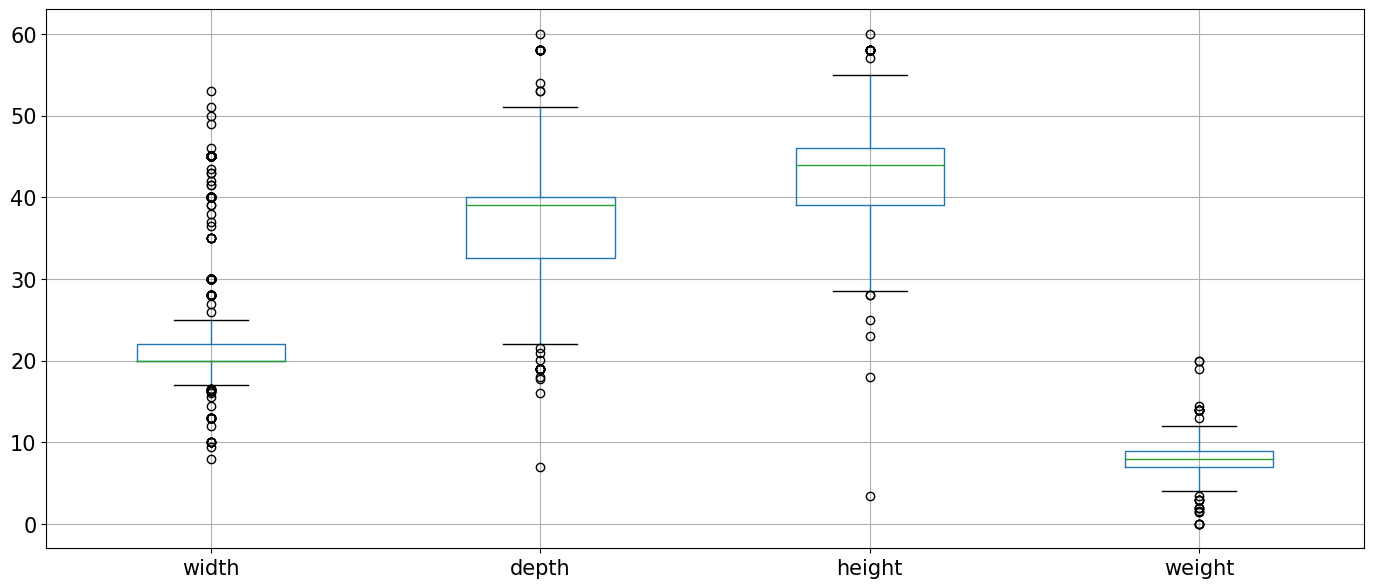

In [ ]:
# построим график и увидим какой ширины, глубины, высоты и веса распространены компьютеры
axes = plt.subplots(figsize=(17,7))
column_list = ['width', 'depth', 'height', 'weight']
plot_nearest = df.boxplot(column=column_list, fontsize=15)

Поскольку заказчику нужно понимать какие характеристики компьютера пользуется спросом, какие покупают и изготавливают, то такая характеристика как рамер служит для технического обзора - заказчик может оценить что на рынке больше всего.

Получается по графику:
- ширина - "width" - наиболее распространена от 16-25 см;
- глубина - "depth" - от 22-51 см;
- высота - "height" - от 28-55 см;
- вес - "weight" - от 5-13 кг.

Нужно напомнить, что компьютер можно повернуть и высота станет глубиной или шириной, т.е. измерить товар можно в зависимости как его поставить. Все что по графику "за усами" - это выбросы - которые как ранее было сказано не влияют на анализ.

In [ ]:
df['price'].describe()

count      3300.000000
mean      68666.764242
std       32139.876191
min       12500.000000
25%       41674.250000
50%       67200.000000
75%       84392.000000
max      235900.000000
Name: price, dtype: float64

<Axes: >

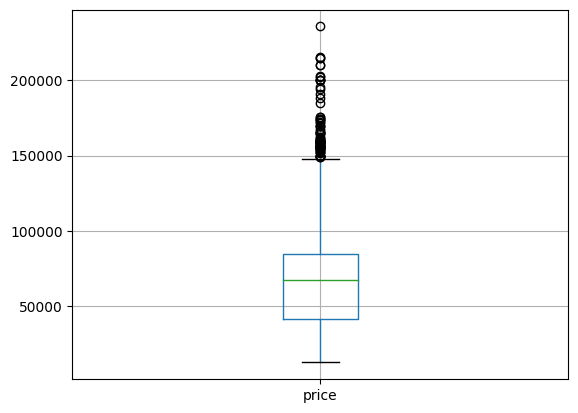

In [ ]:
df.boxplot(column='price')

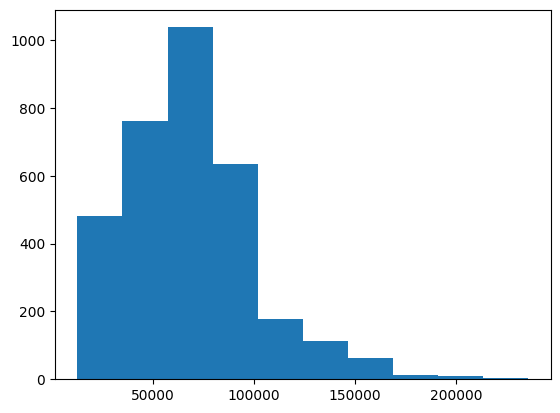

In [ ]:
plt.hist(df['price'])
plt.show()

Что касается цены, то в основном она находится от 12 тыс.руб. до 150 тыс.руб. (минимальное значение - 12500, максимальное - 235900). Все что выше "усов" выбросы. Как ранее нами было выявлено медиана и средняя практически равны и имеют значение в 68000 руб., поэтому говорить о влиянии выбивающихся значений на анализ не можем - оставим их и не будем удалять. Дорогие компьютеры могут быть и наши данные это вполне реальные цены - анамальными их считать нельзя.

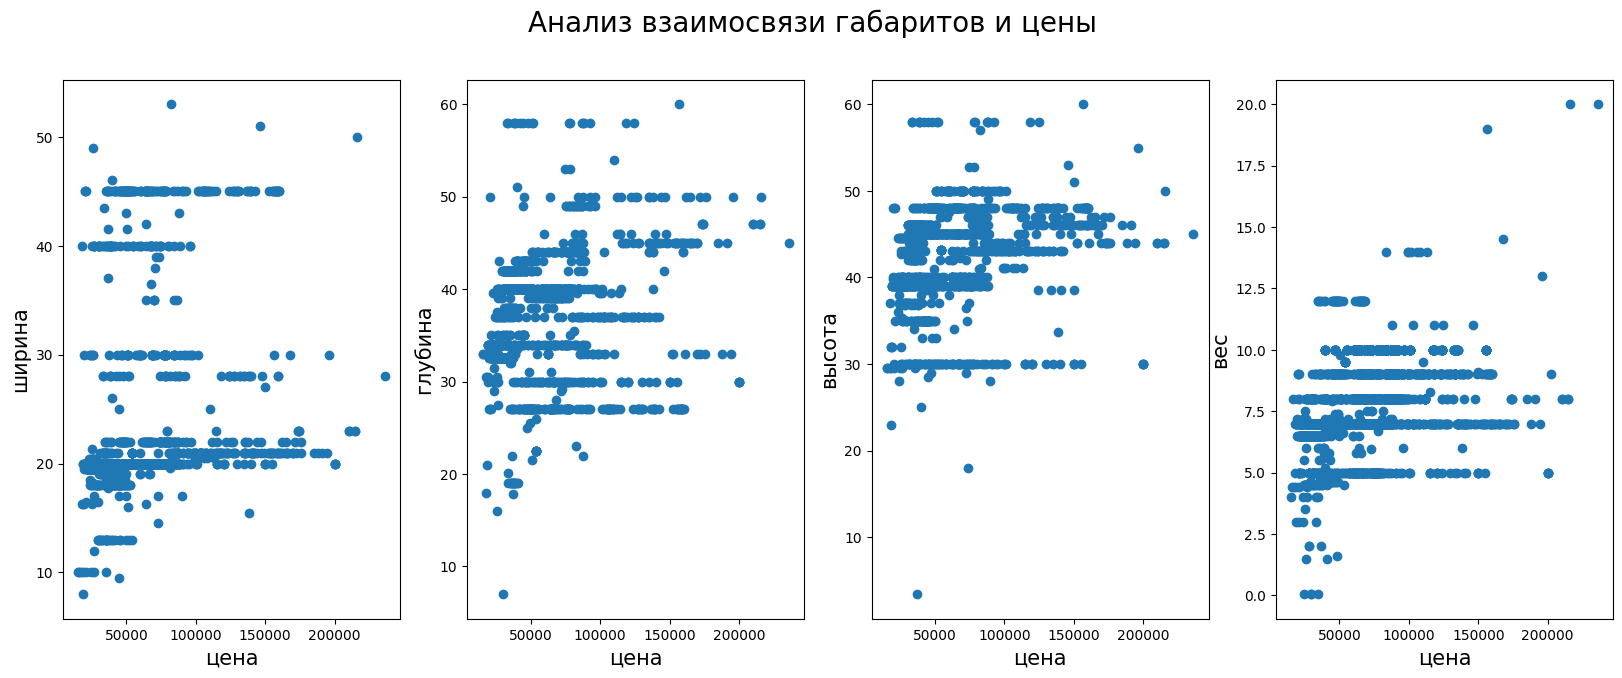

,width,depth,height,weight,price
width,1.000000,-0.412422,0.422823,0.437334,0.225323
depth,-0.412422,1.000000,0.307292,0.037433,0.120988
height,0.422823,0.307292,1.000000,0.547939,0.226818
weight,0.437334,0.037433,0.547939,1.000000,0.347289
price,0.225323,0.120988,0.226818,0.347289,1.000000


In [ ]:
# посмотрим есть ли зависимость цены от габаритов
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 7))
fig.suptitle("Анализ взаимосвязи габаритов и цены", fontsize=20)

ax1.scatter(x=df_wdhw['price'], y=df_wdhw['width'])
ax1.set_xlabel("цена",fontsize=15)
ax1.set_ylabel("ширина",fontsize=15)

ax2.scatter(x=df_wdhw['price'],y=df_wdhw['depth'])
ax2.set_xlabel("цена", fontsize=15)
ax2.set_ylabel("глубина", fontsize=15)

ax3.scatter(x=df_wdhw['price'],y=df_wdhw['height'])
ax3.set_xlabel("цена", fontsize=15)
ax3.set_ylabel("высота", fontsize=15)

ax4.scatter(x=df_wdhw['price'],y=df_wdhw['weight'])
ax4.set_xlabel("цена", fontsize=15)
ax4.set_ylabel("вес", fontsize=15)

plt.show()



# зависимость по корреляции Пирсона
df_wdhw.corr()

 **Вывод**: в целом мы увидели габариты и цену, на которые можно ориентироваться при сборке компьютера:
- ширина - "width" - от 16-25 см;
- глубина - "depth" - от 22-51 см;
- высота - "height" - от 28-55 см;
- вес - "weight" - от 5-13 кг;
- цена - "price" - от 12 500-150 000 руб.

Можно представить средний компьютер шириной 20 см, глубиной 39 см., высотой 44 см. и весом 7-8 кг. и средняя цена такого компьютера 68 000 руб. Данные показатели - габариты - являются описательными и зависимости с ценой нет.

По графику видим, что ни один параметр не имеет взаимосвязи с ценой, это же и подтверждает корреляция Пирсона. Интересную небольшую взаимосвязь выявлена между:
- высотой и весом - корреляция = 0.54
- шириной и весом - корреляция = 0.43
- шириной и высотой - корреляция = 0.42

То есть с  увеличением одного параметра увеличивается и другой, что выглядит логично, чем больше становится ширина или высота, тем больше становится вес, но это лишь маленькая зависимость.


## Посмотрим связь объема накопителя HDD и SSD с ценой

HDD = классический жесткий диск, работающий по технологии магнитной записи. Внутри такого диска стоят от 1 до 5 "блинов" на которые информация пишется при помощи магнитной головки. Его главный плюс в долговечности, низкой цене, надежности в стабильных условиях работы. Минусы - скорость и механика, выходящая из строя со временем.

SSD = твердотельный накопитель, грубо говоря, флешка, но в удобном размере для подключения к разъему SATA.

In [ ]:
# посмотрим какой объема накопителя HDD преобладает
print(df['storage_capacity_HDD'].value_counts())

# создадим таблицу для визуализации
HDD = df['storage_capacity_HDD'].value_counts().reset_index().head(3)
HDD.columns=('HDD', 'count')
print()
print('Всего значений по параметру HDD равно', df['storage_capacity_HDD'].count(), 'или', round(df['storage_capacity_HDD'].count()/df['id'].count()*100),'%')

1000    887
500      59
2000     29
512       8
250       2
3000      1
4000      1
1024      1
Name: storage_capacity_HDD, dtype: Int64

Всего значений по параметру HDD равно 988 или 30 %


Видим что наиболее частый объем HDD это 1000 гб. А всего 9 типов объема памяти. Также есть объемы в 500 и 2000 гб, но они редко встречаемые значения. Можно сделать вывод, что почти во всех компьютерах ставят объем накопителя HDD 1000 гб. Но всего в 30% компьютерах из всех данных ставят этот накопитель.

In [ ]:
# посмотрим какой объема накопителя SSD преобладает
print(df['storage_capacity_SSD'].value_counts())

# создадим таблицу для визуализации
SSD = df['storage_capacity_SSD'].value_counts().reset_index().head(7)
SSD.columns=('SSD', 'count')
print()
print('Всего значений по параметру SSD равно', df['storage_capacity_SSD'].count(), 'или', round(df['storage_capacity_SSD'].count()/df['id'].count()*100),'%')

480     1041
1000     672
512      361
240      314
256      231
960      201
120      104
500       79
128       50
2000      44
250       15
1240       6
1480       6
1024       4
1500       4
16         1
60         1
1256       1
Name: storage_capacity_SSD, dtype: Int64

Всего значений по параметру SSD равно 3135 или 95 %


Можно выделить 7 наиболее встречаемыех значений накопителя SSD: 480 - лидирует среди всех, 1000, 512, 240, 256, 960, 120 гб.

95% компьютеров оснащены SSD  накопителем, а HDD накопитель стоит лишь в 30% ПК.


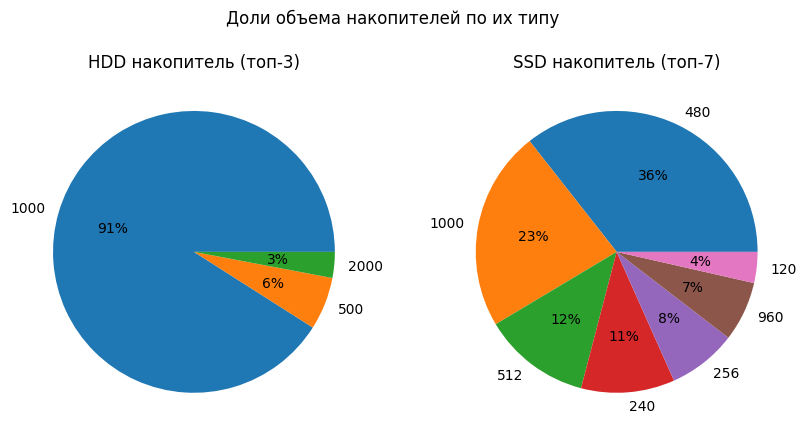

In [ ]:
# посмотрим на графике наши таблицы
fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Доли объема накопителей по их типу', fontsize=12)
ax1.pie(HDD['count'], labels=HDD['HDD'], autopct='%.0f%%')
ax1.set_title('HDD накопитель (топ-3)', fontsize=12)
ax2.pie(SSD['count'], labels=SSD['SSD'], autopct='%.0f%%')
ax2.set_title('SSD накопитель (топ-7)', fontsize=12);

Как видим на графике, если и ставят HDD накопитель то в основном в 1000 гб - 91% доля из топ-3. А SDD накопители ставят разного объема и практически во всех ПК. Самая большая доля из топ-7 это 36% у объема в 480 гб, затем 23% занимает объем в 1000 гб.

In [ ]:
# посмотрим сколько компьютеров с двумя накопителя сразу
drive_2= df[(df['storage_capacity_HDD'] > 0) & (df['storage_capacity_SSD'] > 0)]
print('Всего компьютеров имеющих два накопителя сразу равно', round(drive_2['id'].count()/df['id'].count()*100),'%')
print('Средняя цена компьютеров с двумя накопителями сразу составляет', round(drive_2['price'].mean()))
print()
print('Посмотри какие SSD накопители ставят вместе с HDD:')
print(drive_2['storage_capacity_SSD'].value_counts())

Всего компьютеров имеющих два накопителя сразу равно 29 %
Средняя цена компьютеров с двумя накопителями сразу составляет 80312

Посмотри какие SSD накопители ставят вместе с HDD:
480     550
512     122
240      98
256      81
120      50
500      31
1000     11
250      10
960       8
128       5
2000      2
16        1
Name: storage_capacity_SSD, dtype: Int64


То есть только каждый третий ставит в ПК 2 накопителя сразу - всего 29% из общего объема данных. Скорее всего из-за того, что это достаточно затратно и не всем нужен объем памяти в двух накопителях сразу. Можно поставить один с необходимым объемом и без лишних технических трудностей и трат. Также нами до этого было выявлено, что только 30% производителей из всех данных ставят HDD накопитель - выходит его ставят всегда вместе с SDD. Скорее всего SDD  накопитель более удобен и ставят его во всех ПК (даже если есть в нем HDD) - так как он более техничен и универсален.

Мы нашли, что с HDD ставят SSD в основном не более 500 гб, что выглядит логично и правдаподобно - когда есть 1000 гб, то дополнительно устанавливают немного на "всякий случай", да и затратно.

**Ниже рассмотрим каждый накопитель в отдельности и влияние их на цену.**

In [ ]:
# переведем тип данных во float, чтобы построить график рассеивания - зависимости
df['storage_capacity_HDD'] = df['storage_capacity_HDD'].astype(float)
df['storage_capacity_SSD'] = df['storage_capacity_SSD'].astype(float)

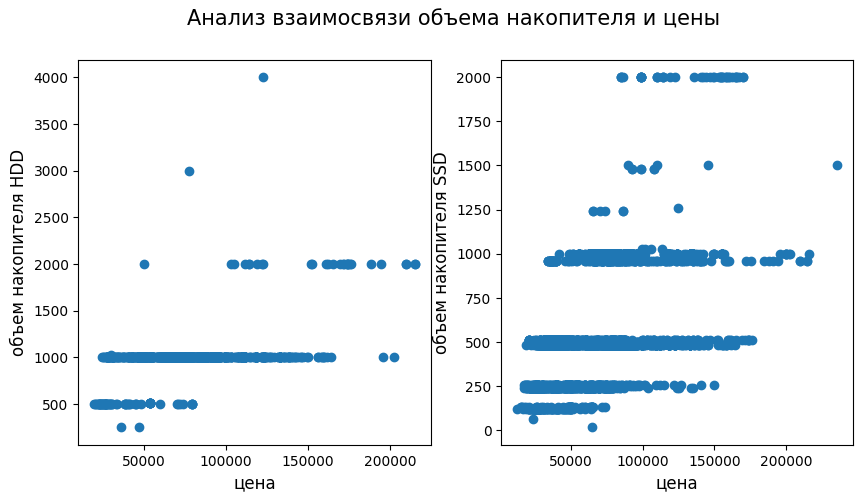

Корреляция HDD: 0.49220397091316226
Корреляция SSD: 0.49155573112025946


In [ ]:
# посмотрим есть ли зависимость цены от объема накопителя и его типа
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Анализ взаимосвязи объема накопителя и цены", fontsize=15)

ax1.scatter(x=df['price'], y=df['storage_capacity_HDD'])
ax1.set_xlabel("цена",fontsize=12)
ax1.set_ylabel("объем накопителя HDD",fontsize=12)

ax2.scatter(x=df['price'],y=df['storage_capacity_SSD'])
ax2.set_xlabel("цена", fontsize=12)
ax2.set_ylabel("объем накопителя SSD", fontsize=12)

plt.show()

print('Корреляция HDD:', df['price'].corr(df['storage_capacity_HDD']))
print('Корреляция SSD:', df['price'].corr(df['storage_capacity_SSD']))

Зависимсоть цены от данных параметров прослеживается. По графику, связь более видна у накопителя SSD. По корреляции Пирсона равной 0.49 мы можем сказать что она небольшая у обоих накопителей. То есть цена компьютера увеличивается, если объем накопителей будет больше.

In [ ]:
# поскольку 91% данных HDD имеют 1000 гб, то посмотрим ее среднюю цену.
# по остальным объемам слишком мало значений и они уже не нужны - мы выявили единичного лидера

HDD_price_mean = df.query('storage_capacity_HDD == 1000')['price'].mean()
print('Средняя цена компьютера с объемом HDD накопителя в 1000 гб. равен', round(HDD_price_mean))


Средняя цена компьютера с объемом HDD накопителя в 1000 гб. равен 79913


Напомним, что HDD накопитель в 1000 гб. стаят в 91% компьютерах и таких ПК с ним лишь в каждом третьем (всего в 30% они стоят). Остальные объемы ставятся в очень малом количестве ПК. Также мы ранее выявили, что два типа накопителя в одном ПК ставят тоже не часто - в 29%. То есть HDD накопитель почти всегда ставится с SDD накопителем.  Средняя цена ПК с объемом 1000 гб. составляет 79913 руб (ранее нами было выявлено, что средняя цена с 2-мя накопителями сразу примерно такая же- 80312 руб. - что еще раз подтверждает, HDD ставят почти всегда с SDD). Все же по графику прослеживается зависимсость средней цены от объема накопителя (по корреляции пирсона 0.49).

In [ ]:
# создадим таблицу со средней стоимостью ПК и накопителем SSD без учета HDD

df['storage_capacity_HDD'] = df['storage_capacity_HDD'].fillna(0)
SDD = df[(df['storage_capacity_HDD'] == 0) & (df['storage_capacity_SSD'] > 0)]
SSD_price = SDD.groupby('storage_capacity_SSD')['price'].mean().round().reset_index()
SSD_price.columns=('SSD', 'price_mean')
SSD_price = SSD_price.query('SSD == [480, 1000, 512, 240, 256, 960, 120]')
SSD_price['SSD'] = SSD_price['SSD'].replace({120: '120 гб', 240: '240 гб', 256: '256 гб', 480: '480 гб', 512: '512 гб', 960: '960 гб', 1000: '1000 гб'})
print(SSD_price)

# визуализируем наши данные по SSD накопителю
fig = px.bar(SSD_price, x='price_mean', y='SSD', text='price_mean', color='SSD')
fig.update_layout(title = 'Средняя цена топ-7 накопителей SSD',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Объем накопителя',
                  showlegend = False)
fig.show()

        SSD  price_mean
1    120 гб     31503.0
3    240 гб     44329.0
5    256 гб     44146.0
6    480 гб     50355.0
8    512 гб     52019.0
9    960 гб     83759.0
10  1000 гб     85662.0


Здесь оценить объема накопителя SSD и цены ПК с ним будет более объективным, потому что мы оценивали этот показатель без HDD. Как ранее было выявлено этот накопитель ставится почти во всех ПК - 95%, чем HDD (он лишь стоит в 30%). Так же здесь обнаружено топ-7 объемов накопителей с различной их долей. Мы выявили, что объем в 480гб больше пользуется спросом- 36%, затем идет 1000гб. - 23%, далее 512гб -12%, 960гб-7% и т.д.

Средняя цена ПК имеет зависисмость от объема SSD. Чем больше объем накопителя, тем больше средняя стоимость ПК.


**Вывод:** В этом разделе провели большой анализ и всесторонне посмотрели на HDD и SSD накопители.

Нашли интересные особенности:
- HDD ставится в 30% компьютеров
- HDD объемом 1000 гб. установлен в 91% ПК, где стоит этот тип накопителя и его средняя цена 79913 руб.
- HDD устанавливается почти всегда вместе с SSD накопителем
- два накопителя сразу стоят в 29% ПК и средняя их цена 80312 руб (что еще раз подтверждает что HDD почти всегда идет вместе с SSD)
- зависимость цены от объема накопителей HDD и SSD прослеживается - больше объем-больше стоимость ПК.
- найдено 7 типов объема у накопителя SSD и лидируют в нем 480 гб и 1000 гб - они установлены в более 50% ПК с этим типом накопителя
- 1000 гб HDD установлен вместе с SSD имеющий объем не более 500 гб., так как большего не требуется и цена остается приемлемой (но таких ПК всего 30%)
- SSD установлен в 95% копьютеров - так как он более техничен, универсален и удобен, чем тип HDD

Итак:
- ПК имеющий 2 типа накопителя: 1000гб HDD + 500гб = в среднем 80 т.р.
- ПК имеющий только SSD накопитель в 1000гб = в среднем 85 т.р.

Получается SSD устанавливают в каждом ПК, несмотря на влияние на стоимость ПК в большую сторону, так как он лучше по техническим параметрам. Для более бюджетного варианта можно установить меньший объем SSD или заменить часть памяти на HDD - тем самым удешивить стоимость ПК.

Популярным остаются объемы HDD - в 1000гб и SSD - в 480 либо 1000 гб.

## Проанализируем тип и объем оперативной памяти и связь их с ценой


In [ ]:
# посмотрим еще раз какой тип памяти и объем есть в данных
display(df['type_of_RAM'].value_counts().to_frame())
print()
display(df['amount_of_RAM'].value_counts().to_frame())

,type_of_RAM
DDR 4,2921
не заполнено,194
DDR 3,168
DDR 5,14
16,2
16 Гб,1


,amount_of_RAM
16,1916
32,670
8,469
4,67
64,38
240,1
6,1
1000,1


Явно выделяется лидер в типе оперативной памяти это DDR4 - четвёртое поколение оперативной памяти, являющееся эволюционным развитием предыдущих поколений DDR. Отличается повышенными частотными характеристиками и пониженным напряжением питания. Логично, что его устанавливают во все практически компьютера - он лучше остальных, а следующее поколение DDR5 еще не успел себя зарекомендовать. Поэтому связи здесь и влияния на цену мы не увидим.

Что касается объема оперативной памяти, то видим 3-ку лидеров, где явно выделяется среди них 16 гб. - его чаще всех устанавливают в ПК. Их мы и будем анализировать, посмотрим взаимосвязь с ценой.

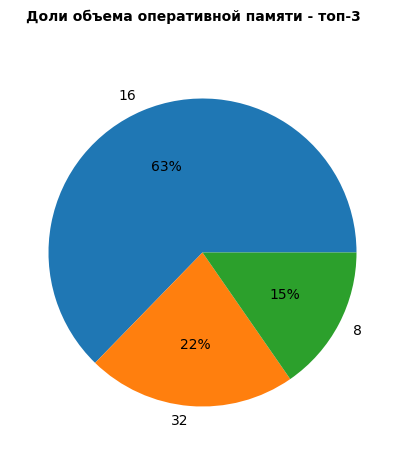

In [ ]:
# создадим табличку для визуализации
amount_of_RAM = df['amount_of_RAM'].value_counts().reset_index().head(3)
amount_of_RAM.columns=('amount', 'count')

# визуализируем табличку
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доли объема оперативной памяти - топ-3', fontsize=10, fontweight="bold")
ax1.pie(amount_of_RAM['count'], labels=amount_of_RAM['amount'],  autopct='%.0f%%');

16 гб памяти занимет 63% из топ-3. Таким образом в более половине компьютеров ставится оперативная память этого объема.

Далее посмотрим есть ли взаимосвязь с ценой.

In [ ]:
print('Cредняя цена ПК с памятью в 8 гб =', round(df[df['amount_of_RAM'] == 8]['price'].mean()))
print('Cредняя цена ПК с памятью в 16 гб =', round(df[df['amount_of_RAM'] == 16]['price'].mean()))
print('Cредняя цена ПК с памятью в 32 гб =', round(df[df['amount_of_RAM'] == 32]['price'].mean()))

Cредняя цена ПК с памятью в 8 гб = 43803
Cредняя цена ПК с памятью в 16 гб = 67405
Cредняя цена ПК с памятью в 32 гб = 97033


Самый распространенный объем в 16 гб стоит в среднем 67405 руб., практически таже средняя стоимость, которую мы нашли по всему столбцу "price" - 68000 руб. Судя по тому, что средняя цена ПК растет вместе с ростом объема оперативной памяти, то можем предположить о наличии взаимосвязи.

Посмотрим график рассеивания и корреляцию пирсона.

Корреляция: 0.23711343542976943



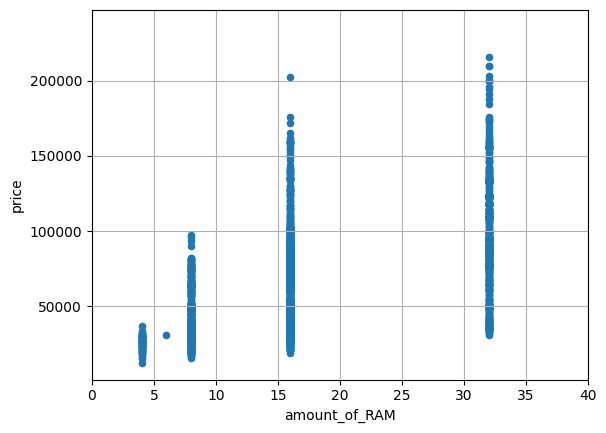

In [ ]:
# построим график рассеивания и корреляцию Пирсона.
df['amount_of_RAM'] = df['amount_of_RAM'].astype(float)
print('Корреляция:', df['amount_of_RAM'].corr(df['price']))
print()
df.plot(x='amount_of_RAM',y='price', kind='scatter', grid=True, xlim=(0, 40));

График показывает, что с ростом объема гб - размах в цене увеличивается, т.е. у 8гб - размах цены от 13-100 т.р., у 16гб - от 15-170т.р., а у 32гб - от25-220 т.р. Хотя по корреляции Пирсона зависимости нет. Но ранее мы увидели, как растет средняя цена от объема памяти - это произошло так как размах в стоимости увеличился - поэому и средняя по каждому параметру тоже. Можно сказать - при увеличении объема оперативной памяти - размах в стоимости тоже увеличивается, да и значений в 8гб и 32 гб намного меньше.

Таким образом если мы поставим большую память, то цену тоже можем смело ставить больше. В целом оценивается ПК не только по данной характеристике и многим другим. **Объем оперативной памяти не самый влияющий параметр.**


**Вывод**: Более 60 % компьютеров имеют оперативную память 16 гб., затем 23% - 32 гб. Популярными можем считать эти два объема. Зависимости явной нет, но при увеличении объема размах в стоимости становится больше. Также мы увидели, что почти во всех ПК стоит тип памяти-DDR4-является совеременным и эволюционным развитием предыдущих поколений оперативной памяти.

## Посмотрим тип процессора и количество ядер в нем

In [ ]:
# посмотрим еще раз какой тип процессора есть в данных
display(df['processor_type'].value_counts().to_frame())

,processor_type
intel core i5,1028
intel core i7,648
amd ryzen 5,480
intel core i3,441
amd athlon,121
amd ryzen 7,71
intel xeon,70
amd ryzen 3,51
amd a6,44
intel pentium,37


Из всего многообразия типов процессора можно выделить топ-5:
- intel core i5
- intel core i7
- amd ryzen 5
- intel core i3
- amd athlon

Также явно 2 компании конкурируют между собой в сфере производства процессоров:
- Intel
- AMD

И из них выигрывает компания Intel - поскольку он более популярен и разрекламирован - у каждого "на слуху", также совершенствует он быстрее свои программы.

Явный лидер из всех типов - Intel Core i5 — семейство процессоров x86-64 от Intel. Позиционируется как семейство процессоров среднего уровня цены и производительности, между более дешёвым Intel Core i3 и более дорогим Core i7.



In [ ]:
# посмотрим количество ядер имеющихся в таблице
display(df['processor_cores'].value_counts().to_frame())

,processor_cores
6,1378
4,633
8,382
12,284
2,238
10,126
24,60
16,45
14,7
20,6


Здесь тоже явно прослеживается топ-5 ядер:- 6, - 4, - 8, - 12, - 2. Лидером стал 6 ядерный процессор.

Далее создадим таблички для каждого топ-5 с их долей и средней ценой. сделаем графики и наглядно все посмотрим.

In [ ]:
# создадим таблицу из топ-5 типов процессора
processor_type = df['processor_type'].value_counts().reset_index().head(5)
processor_type.columns=('processor_type', 'count')
processor_type['shape'] = round(processor_type['count']/processor_type['count'].sum()*100)
price_type = df.query('processor_type == ["intel core i5",	"intel core i7", "amd ryzen 5",	"intel core i3",	"amd athlon"]')
price_type =price_type.groupby('processor_type')['price'].mean().reset_index()
type_price = pd.merge(processor_type, price_type, on='processor_type')
type_price['price'] = round(type_price['price'])
type_price = type_price.sort_values(by='price', ascending=False)
type_price

,processor_type,count,shape,price
1,intel core i7,648,24.0,97775.0
0,intel core i5,1028,38.0,75458.0
2,amd ryzen 5,480,18.0,59333.0
3,intel core i3,441,16.0,44540.0
4,amd athlon,121,4.0,35330.0


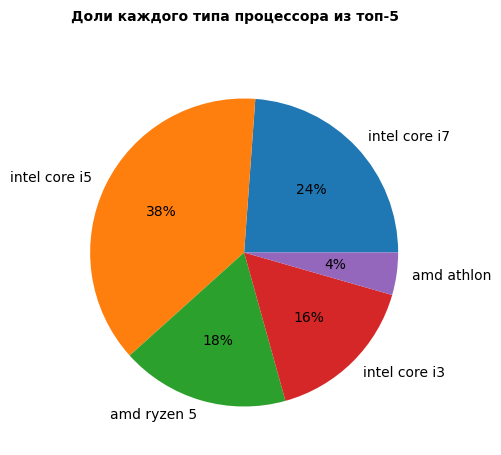

In [ ]:
# посмотрим на графике доли каждого типа из топ-5
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доли каждого типа процессора из топ-5', fontsize=10, fontweight="bold")
ax1.pie(type_price['count'], labels=type_price['processor_type'],  autopct='%.0f%%');

# визуализируем среднюю цену по типу процессора
fig = px.bar(type_price, x='price', y='processor_type', text='price', color='processor_type')
fig.update_layout(title = 'Средняя цена топ-5 типов процессора',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Тип процессора',
                  showlegend = False)
fig.show()

Отчетливо видим, что наиболее популярен процессор 'intel core i5' - доля из топ-5 составляет 38%, затем по популярности идет "intel core i7" - 24% и "amd ryzen 5" - 18%

Что касается средней цены, то она самая высокая у "intel core i7" - 97775р., затем идет у 'intel core i5' - 75458 р. и это говорит о зависимости цены от такого параметра как "Тип процессора". Также ранее мы узнали, что Intel Core i5 — процессор среднего уровня цены и производительности, между более дешёвым Intel Core i3 и более дорогим Core i7, то есть вполне логично, что более технологичный процессор стоит дороже предыдущего. Возможно именно поэтому ставятся процессоры в большинстве своем i5, ведь следующий за ним стоит дороже и потребители смотрят не только на качество но и стоимость. По принципу "цена-качество" выигрывает "Intel Core i5" (цена его близка к среднему по рынку -68т.р.)


In [ ]:
# создадим таблицу из топ-5 количества ядер
df['processor_cores'] = df['processor_cores'].astype(float)
processor_cores = df['processor_cores'].value_counts().reset_index().head(5)
processor_cores.columns=('processor_cores', 'count')
price_cores = df.query('processor_cores == [2, 4, 6, 8, 12]')
price_cores =price_cores.groupby('processor_cores')['price'].mean().round().reset_index()
cores_price = pd.merge(processor_cores, price_cores, on='processor_cores').sort_values(by='price', ascending=False)
cores_price['processor_cores'] = cores_price['processor_cores'].replace({12.0: '12 ядер', 8.0: '8 ядер', 6.0: '6 ядер', 4.0: '4 ядра', 2.0: '2 ядра'})
cores_price

,processor_cores,count,price
3,12 ядер,284,109329.0
2,8 ядер,382,84271.0
0,6 ядер,1378,69111.0
1,4 ядра,633,43440.0
4,2 ядра,238,41102.0


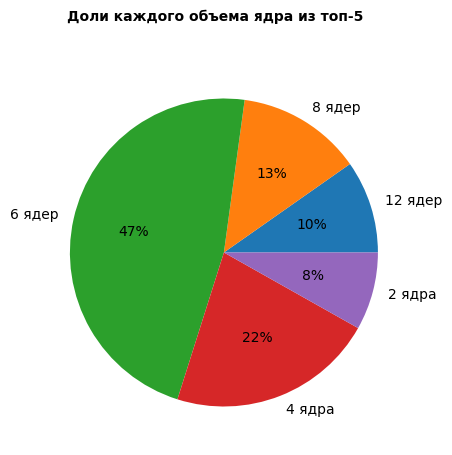

In [ ]:
# посмотрим на графике доли каждого объема ядра из топ-5
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доли каждого объема ядра из топ-5', fontsize=10, fontweight="bold")
ax1.pie(cores_price['count'], labels=cores_price['processor_cores'],  autopct='%.0f%%');

# визуализируем среднюю цену по типу процессора
fig = px.bar(cores_price, x='price', y='processor_cores', text='price', color='processor_cores')
fig.update_layout(title = 'Средняя цена топ-5 объема ядра',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Тип процессора',
                  showlegend = False)
fig.show()

Корреляция: 0.4399379198325946



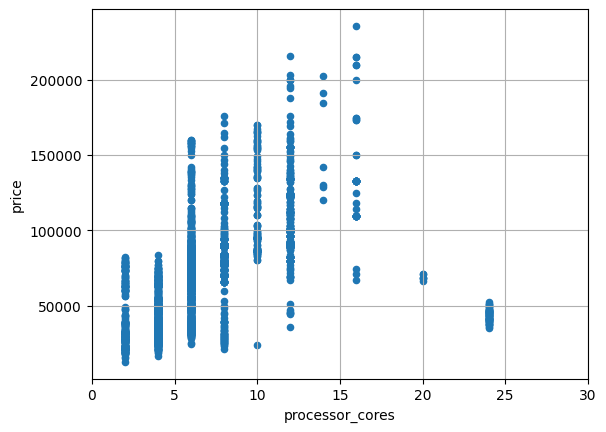

In [ ]:
# построим график рассеивания и корреляцию Пирсона
print('Корреляция:', df['processor_cores'].corr(df['price']))
print()
df.plot(x='processor_cores',y='price', kind='scatter', grid=True, xlim=(0, 30));

По количеству ядер устанавливаемых в ПК лидирует "6 ядер" - 47% из топ-5, далее идет "4 ядра" - 22%. Видим по средней цене самая высокая у "12 ядер" - 109329 р., что тоже выглядит правдаподобно. Чем болше количество ядер процессора, тем выше его цена. По графику рассеивания и корреляции мы подтверждаем зависимость цена-объем ядра - "чем больше, тем больше", хоть она и не ярко выраженная (0.43).

Потребители ориентируясь по цене и качеству, предпочитают компьютеры с 6-ядерным процессором, так как цена такого ПК близка к средней по рынку (68т.р. ранее мы высчитали его по всему столбцу).

**Вывод**: Из всего многообразия типов процессора мы нашли топ-5 и среди них по популярности выделяется Intel Core i5 — позиционируется как семейство процессоров среднего уровня цены и производительности, между более дешёвым Intel Core i3 и более дорогим Core i7.

Процессор 'intel core i5' имеет долю из топ-5 - 38%, затем по популярности идет "intel core i7" - 24% и "amd ryzen 5" - 18%.

Также явно 2 компании конкурируют между собой в сфере производства процессоров:
- Intel
- AMD

И из них выигрывает компания Intel - поскольку он более популярен и разрекламирован - у каждого "на слуху", также совершенствует он быстрее свои программы.

Найдена зависимость цены от типа процессора в ПК. У "intel core i7" высокая цена поскольку он более технологичен, последняя версия, соответственно компьютер будет с ним дороже, чем с предыдущим процессором этого семейства - 'intel core i5'. Именно поэтому ставятся процессоры в большинстве своем i5, ведь следующий за ним стоит дороже и потребители смотрят не только на качество но и стоимость. По принципу "цена-качество" выигрывает "Intel Core i5" - его близка к среднему по рынку -68т.р.

По количеству ядер устанавливаемых в ПК лидирует "6 ядер" - 47% из топ-5, далее идет "4 ядра" - 22%. Видим по средней цене самая высокая у "12 ядер", что тоже выглядит правдаподобно. Чем болше количество ядер процессора, тем выше его цена. По графику рассеивания и корреляции мы подтверждаем зависимость цена-объем ядра - "чем больше, тем больше", хоть она и не ярко выраженная (0.43). Потребители ориентируясь по цене и качеству, предпочитают компьютеры с 6-ядерным процессором, так как цена такого ПК близка к средней по рынку.

Таким образом производители устанавливают в компьютеры в большинстве случаем процессоры компании Intel типа i5 и i7 с "6 ядрами" и "4 ядрами", поскольку они по "цене-качеству" более выгодны.

## Страна производства

In [ ]:
# найдем страны производства
country = df['country'].value_counts().reset_index()

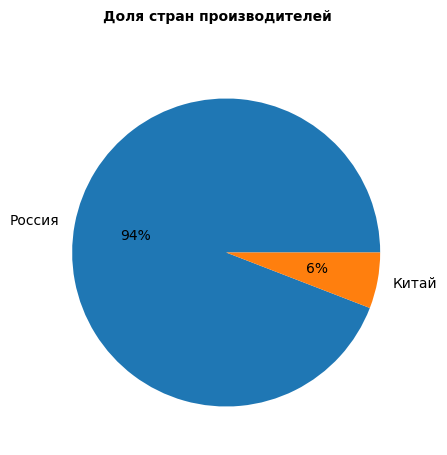

In [ ]:
# посмотрим на графике доли каждого объема ядра из топ-5
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доля стран производителей', fontsize=10, fontweight="bold")
ax1.pie(country['country'], labels=country['index'],  autopct='%.0f%%');

**Вывод**: 94% компьютеров собираются в России и лишь 6% в Китае. Детали скорее всего в большинстве своем не российского производства, но поскольку компьютеры-сборные и собираются в России, то страной производства называют именно ее.

## Гарантийный срок

In [ ]:
warranty_period = df['warranty_period'].value_counts().reset_index()
warranty_period

,index,warranty_period
0,36,1279
1,12,654
2,24,37
3,3,2
4,6,1


Видим, что наибольшее число компьютеров имеют гарантийный срок в 36 месяцев - 3 года, затем идет 12 месяце -1 год.

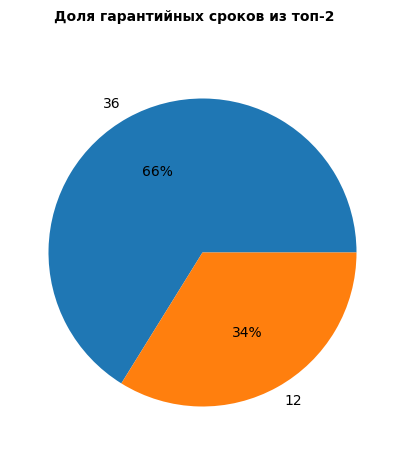

In [ ]:
# топ-2 гарантийного срока
warranty_period = warranty_period.head(2)

# посмотрим долю 36 и 12 месяцев
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доля гарантийных сроков из топ-2', fontsize=10, fontweight="bold")
ax1.pie(warranty_period['warranty_period'], labels=warranty_period['index'],  autopct='%.0f%%');

66 % ПК имеют гарантийный срок 3 года, а 34% 1 год.

Корреляция: 0.09221388968159425



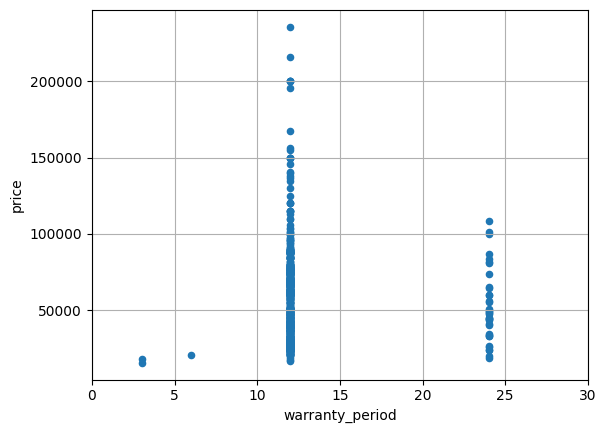

In [ ]:
# построим график рассеивания и корреляцию Пирсона
df['warranty_period'] = df['warranty_period'].astype(float)
print('Корреляция:', df['warranty_period'].corr(df['price']))
print()
df.plot(x='warranty_period',y='price', kind='scatter', grid=True, xlim=(0, 30));

Никакой зависимсоти между гарантийным сроком и ценой нет.

**Вывод**: в большинстве гарантию производители устанавлвают в 3 года или 1 год. И зависисмости с ценой нет. Гарантия дает уверенность для покупателей, что компьютер качественный, поэтому многие дают большую гарнтию для привлечения клиентов к своему ПК.

## Операционная система


In [ ]:
# посмотрим какие уникальные названия есть
df['operating_system'].unique()

array(['отсутствует', 'windows пробная', 'Windows 10 Pro', 'Windows 10',
       'Windows 10 Home', 'Windows 11', 'Windows 11 Pro (Trial)',
       'Windows 10 Home пробная', 'Windows 11 Pro',
       'Windows пробная версия', 'Windows 11 Home', 'windows 10 trial',
       'Windows 10 пробная', 'Free DOS', 'Microsoft Windows 11',
       'Windows 10 Pro Trial', 'Windows', 'DOS',
       'Windows 10 Pro; Office 2016 Home and Business', 'windows 10 pro',
       'Widows 11 Pro', 'WINDOWS 10', 'WINDOWS 11', 'windows 10',
       'Без OC', 'Windows 10 pro'], dtype=object)

In [ ]:
# уберем неявные дубликаты

# переведем значения к нижнему регистру
df['operating_system'] = df['operating_system'].str.lower()
df['operating_system'].unique()

array(['отсутствует', 'windows пробная', 'windows 10 pro', 'windows 10',
       'windows 10 home', 'windows 11', 'windows 11 pro (trial)',
       'windows 10 home пробная', 'windows 11 pro',
       'windows пробная версия', 'windows 11 home', 'windows 10 trial',
       'windows 10 пробная', 'free dos', 'microsoft windows 11',
       'windows 10 pro trial', 'windows', 'dos',
       'windows 10 pro; office 2016 home and business', 'widows 11 pro',
       'без oc'], dtype=object)

In [ ]:
df = df.replace({'operating_system':{'microsoft windows 11':'windows 11',
                                     'windows 10 home пробная':'windows 10 home',
                                     'windows пробная версия':'windows пробная',
                                     'windows 10 trial':'windows 10 pro trial',
                                     'windows 10 pro; office 2016 home and business': 'windows 10 pro',
                                     'widows 11 pro':'windows 11 pro',
                                     'windows 10 пробная':'windows пробная',
                                     'без oc':'отсутствует',
                                     'dos':'free dos'}})
df['operating_system'].value_counts()

windows 10 pro            1700
windows 11 pro             650
windows 10                 275
отсутствует                264
windows пробная            246
windows 10 home             45
windows 10 pro trial        42
windows                     31
windows 11                  29
free dos                    11
windows 11 home              5
windows 11 pro (trial)       2
Name: operating_system, dtype: int64

Выделим топ-5 операционных систем: "windows 10 pro", "windows 11 pro",
"windows 10", "отсутствует", "windows пробная". В лидерах среди них - windows 10 pro (та же Windows 10, только для профессионального использования) - операционная система для персональных компьютеров и рабочих станций, разработанная корпорацией Microsoft в рамках семейства Windows NT. Является одним из самых используемых Windows на 2016—2023 годы. Windows 10 — последняя версия Windows, которая поддерживает 32-разрядные процессоры. Её преемнице, Windows 11, требуется 64-разрядный процессор в любой поддерживаемой архитектуре.Разница Windows 10 Pro от windows 10, в том, что профессиональная версия поддерживает от 512 Гб до 2 Тб. Такой объем ОЗУ могут расходовать разве что высокопроизводительные рабочие станции, занимающиеся выполнением сложных моделей симуляций, визуализацией с помощью компьютерных программ или устройства с большим количеством ядер, работающие с несколькими виртуальными машинами.

Производители в большинстве своем ориентируются на потребителей, которые преобретают ПК для работы и учебы, соответственно устанавливают более новый процессор, более современный.

Производители хотят и "идут в ногу со временем".

,operating_system,count,price
2,windows 10,275,48623.0
3,отсутствует,264,53950.0
4,windows пробная,246,54472.0
0,windows 10 pro,1700,72800.0
1,windows 11 pro,650,76804.0


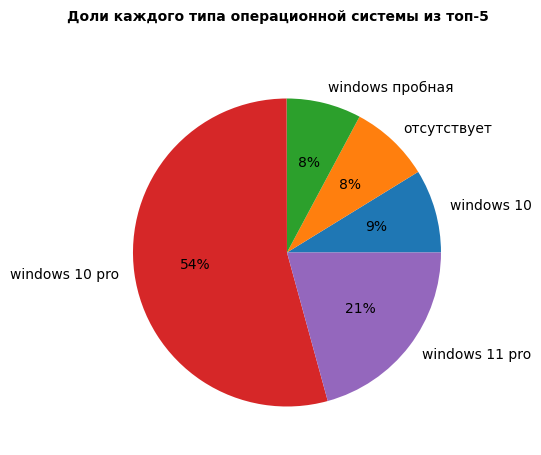

In [ ]:
# сделаем табличку для дальнейшей визуализации
operating_system = df['operating_system'].value_counts().reset_index().head(5)
operating_system.columns=('operating_system', 'count')
price_system = df.query('operating_system == ["windows 10 pro", "windows 11 pro", "windows 10", "отсутствует", "windows пробная"]')
price_system =price_system.groupby('operating_system')['price'].mean().round().reset_index()
operating_system_price = pd.merge(operating_system, price_system, on='operating_system').sort_values(by='price')
display(operating_system_price)

# посмотрим на графике доли каждого типа процессора из топ-5
fig,(ax1) = plt.subplots(figsize=(7, 5))
fig.suptitle('Доли каждого типа операционной системы из топ-5', fontsize=10, fontweight="bold")
ax1.pie(operating_system_price['count'], labels=operating_system_price['operating_system'],  autopct='%.0f%%');

# визуализируем среднюю цену по типу процессора
fig = px.bar(operating_system_price, x='price', y='operating_system', text='price', color='operating_system')
fig.update_layout(title = 'Средняя цена топ-5 типов операционной системы',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Тип процессора',
                  showlegend = False)
fig.show()

Отрыв по количеству установленной операционной системы "windows 10 pro" большой - его доля составляет из топ-5 54%.Затем идет "windows 11 pro" - 21%.

Вполне закономерно выглядит и положение со средней ценой: последняя версия дороже предыдущей. Единственно нам не известно что значит "отсутствует" - то ли заказчик не указал тип процессора, то он не установлен в ПК. В любом случае есть два явных фаворита и мы види что они популярны. Средняя цена с ними варируется 72-76 т.р.

**Вывод**: популярными и востребованными в операционной системе являются "windows 10 pro" и "windows 11 pro" для профессионального использования ПК (для учебы и работы). Зависимость цены от этого параметра прослеживается, чем лучше стоит система-тем дороже ПК.

## Видеопроцессор

In [ ]:
# посмотрим какие видеопроцессоры популярны
df['video_processor'] = df['video_processor'].str.lower()
df['video_processor'].value_counts().head(20)

nvidia geforce rtx 3060    586
nvidia geforce rtx 3050    433
nvidia geforce gtx 1650    321
nvidia geforce gtx 1660    261
amd radeon vega 7          209
nvidia geforce gt 1030     193
nvidia geforce rtx 3070    193
не заполнено               164
intel hd graphics 2000     108
nvidia geforce rtx 2060    107
nvidia geforce rtx 3080     72
intel hd graphics 530       72
amd radeon vega 3           68
nvidia geforce gtx 1050     61
amd radeon r5               48
nvidia                      45
amd radeon rx 580           42
nvidia geforce gtx 1060     28
amd radeon rx 550           28
intel uhd graphics 630      26
Name: video_processor, dtype: int64

По количеству установленных видеопроцессоров, можно выделить топ-10.

Явно выделяются три компании - производителя: Nvidia, AMD, Intel.

In [ ]:
# создадим табличку и проведем анализ
video_processor = df['video_processor'].value_counts().reset_index().head(10)
video_processor.columns=('video_processor', 'count')
list = video_processor['video_processor'].to_list()
print(list)

['nvidia geforce rtx 3060', 'nvidia geforce rtx 3050', 'nvidia geforce gtx 1650', 'nvidia geforce gtx 1660', 'amd radeon vega 7', 'nvidia geforce gt 1030', 'nvidia geforce rtx 3070', 'не заполнено', 'intel hd graphics 2000', 'nvidia geforce rtx 2060']


In [ ]:
price_video = df.query('video_processor == ["nvidia geforce rtx 3060", "nvidia geforce rtx 3050", "nvidia geforce gtx 1650", "nvidia geforce gtx 1660", "amd radeon vega 7", "nvidia geforce gt 1030", "nvidia geforce rtx 3070", "не заполнено", "intel hd graphics 2000", "nvidia geforce rtx 2060"]')
price_video =price_video.groupby('video_processor')['price'].mean().round().reset_index()
video_processor_price = pd.merge(price_video, video_processor, on='video_processor').sort_values(by='price', ascending=False)
video_processor_price

,video_processor,price,count
8,nvidia geforce rtx 3070,129188.0,193
7,nvidia geforce rtx 3060,90996.0,586
6,nvidia geforce rtx 3050,77739.0,433
5,nvidia geforce rtx 2060,75179.0,107
4,nvidia geforce gtx 1660,67189.0,261
3,nvidia geforce gtx 1650,59209.0,321
9,не заполнено,46013.0,164
0,amd radeon vega 7,39675.0,209
2,nvidia geforce gt 1030,38010.0,193
1,intel hd graphics 2000,26818.0,108


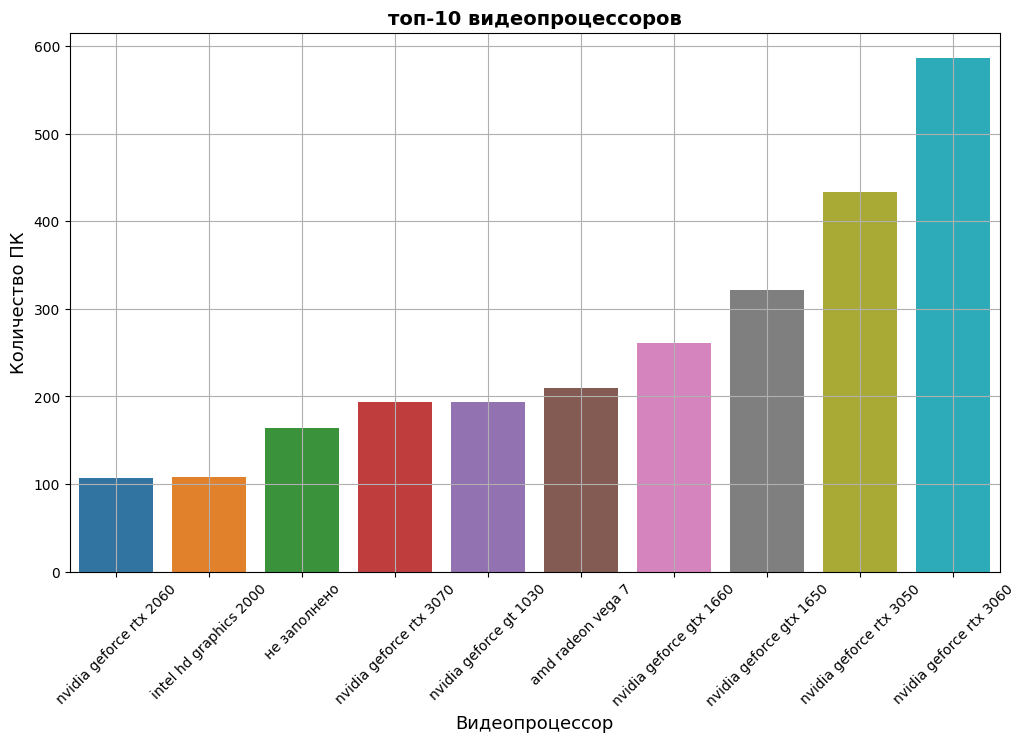

In [ ]:
# визуализируем полученные данные
plt.figure(figsize=(12, 7))
sns.barplot(x='video_processor', y='count', data=video_processor_price.sort_values(by='count'))
plt.title('топ-10 видеопроцессоров', fontsize=14, fontweight="bold")
plt.xlabel('Видеопроцессор', fontsize=13)
plt.ylabel('Количество ПК', fontsize=13)
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
# визуализируем среднюю цену по типу видеопроцессора
fig = px.bar(video_processor_price.sort_values(by='price'), x='price', y='video_processor', text='price', color='video_processor')
fig.update_layout(title = 'Средняя цена топ-10 видеопроцессоров',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Видеопроцессор',
                  showlegend = False)
fig.show()

На момент анонса розничные цены в России начинались с 45 490 рублей за GeForce RTX 3070 (в продаже с октября 2020); с 63 490 рублей за GeForce RTX 3080 (в продаже с 17 сентября 2020); со 136 990 рублей за GeForce RTX 3090 (в продаже с 24 сентября 2020)

**Вывод**:видны три компании - производителя: Nvidia, AMD, Intel. Наиболее популярна семейство графических процессоров компании Nvidia. Взаимосвязь с ценой прослеживается - чем дороже видеопроцессор, тем дороже ПК. Наиболее популярен "nvidia geforce rtx 3060" и "nvidia geforce rtx 3050",  так как они по цене сопоставимы с качеством.

## Посмотрим какие продавцы популярны (будущих конкурентов), объединив 4 параметра - столбца: "seller", "sales", "seller_rating", "feedbacks"

In [ ]:
# объединим столбцы сгруппировав их вокруг продавца и выявим самых популярных
popular = df.pivot_table(index='seller', values=[
    'seller_rating', 'sales', 'feedbacks'], aggfunc={'seller_rating':'mean', 'sales':'sum', 'feedbacks':'sum'})
popular = popular.sort_values(by='sales', ascending=False)
popular

,feedbacks,sales,seller_rating
seller,,,
Robotcomp,4883,6600,4.7
Roo24.ru,1088,1785,4.7
ALFA-SYSTEM,400,830,4.8
ABS-TECHNO.RU,436,700,4.4
Компьютерс,100,365,4.5
Buchok,196,335,4.7
Континент,122,325,4.5
ЗЕОН,70,245,4.7
FREERIDE,351,210,4.9


Сгруппировав столбцы по продавцам, видим топ-4: все остальные что продали меньше 500 ПК в дальнейший анализ не берем.

Наибольшее число проданных компьютеров у продавца "Robotcomp" - 6600 ПК и рейтинг 4.7. Поскольку мы не знаем, какие отзывы - положительные или отрицательные, то этот показатель можем опустить с анализа. Популярность тех или иных продавцом и их ПК можем оценить только по количеству проданных ПК и рейтингу.

Еще заметен интересная особенность: у продавцов "FREERIDE" и "ЖЕЛЕЗНЫЙ ДВОРИК" количество отзывов больше количества проданных товаров - скорее всего это ошибка, либо эти отзывы были "накручины".

Создадим табличку топ-4 продавцов для дальнейшего анализа и визуализации.

In [ ]:
# уберем все лишнее
popular = popular.head(13)
popular = popular.drop(columns='feedbacks')

In [ ]:
# выведем наших топ-13 продавцов
list_1 = popular.index.to_list()
print(list_1)

['Robotcomp', 'Roo24.ru', 'ALFA-SYSTEM', 'ABS-TECHNO.RU', 'Компьютерс', 'Buchok', 'Континент', 'ЗЕОН', 'FREERIDE', 'D-Tora', 'I-GAMEZ КОМПЬЮТЕРЫ', 'COMPDAY.RU', 'ЖЕЛЕЗНЫЙ ДВОРИК']


In [ ]:
# создадим табличку со средней ценой для каждого продавца
seller = df.query("seller == ['Robotcomp', 'Roo24.ru', 'ALFA-SYSTEM', 'ABS-TECHNO.RU', 'Компьютерс', 'Buchok', 'Континент', 'ЗЕОН', 'FREERIDE', 'D-Tora', 'I-GAMEZ КОМПЬЮТЕРЫ', 'COMPDAY.RU', 'ЖЕЛЕЗНЫЙ ДВОРИК']")
seller_price = seller.groupby('seller')['price'].mean().round().reset_index()
seller_price_count = pd.merge(seller_price, popular, on='seller')
seller_price_count

,seller,price,sales,seller_rating
0,ABS-TECHNO.RU,27394.0,700,4.4
1,ALFA-SYSTEM,43040.0,830,4.8
2,Buchok,81377.0,335,4.7
3,COMPDAY.RU,62370.0,115,4.2
4,D-Tora,33317.0,170,4.1
5,FREERIDE,37937.0,210,4.9
6,I-GAMEZ КОМПЬЮТЕРЫ,85886.0,130,4.9
7,Robotcomp,65167.0,6600,4.7
8,Roo24.ru,71725.0,1785,4.7
9,ЖЕЛЕЗНЫЙ ДВОРИК,66531.0,115,4.8


In [ ]:
# график количество проданных ПК топ-13 продавцов
fig = px.bar(seller_price_count.sort_values(by='sales'), x='seller', y='sales', text='sales', color='seller')
fig.update_layout(title = 'Топ-13 продавцов по количеству проданных ПК',
                  xaxis_title = 'Продавец',
                  yaxis_title = 'Количество')
fig.update_xaxes(tickangle=45)
fig.show()

# график рейтинга топ-13 продавцов
fig = px.bar(seller_price_count.sort_values(by='seller_rating'), x='seller', y='seller_rating', text='seller_rating', color='seller')
fig.update_layout(title = 'Средний рейтинг продавцов из топ-13',
                  xaxis_title = 'Продавец',
                  yaxis_title = 'Средний рейтинг')
fig.update_xaxes(tickangle=40)
fig.show()

Явный лидер по продажам продавец "Robotcomp" и рейтинг у него = 4.7. А по рейтингу выигрывают продавцы "FREERIDE" и "I-GAMEZ КОМПЬЮТЕРЫ" = 4.9.

По рейтингу оценивать не объективно, так как большинство имеют примерно равный - от 4.7. рейтинг у 8 продавцов. Поэтому этот параметр мы в выводы брать не будем.

Дальше мы посмотрим почему у продавца "Robotcomp" такие высокие продажи, какие ПК он продает.

In [ ]:
# график средней цены ПК у продавцов из топ-13
fig = px.bar(seller_price_count.sort_values(by='price'), x='price', y='seller', text='price', color='seller')
fig.update_layout(title = 'Средняя цена компьютера у продавцов из топ-13',
                  xaxis_title = 'Средняя цена',
                  yaxis_title = 'Продавец',
                  showlegend = False)
fig.show()

По средней цене более наглядно получился график, чем по рейтингу. Соответственно мы можем выделить продавцов из топ-13 с маленькой средней стоимостью ПК (до 40 т.р.) - ""ABS-TECHNO.RU", "D-Tora", "FREERIDE"  и с высокой средней стоимостью (выше 80 т.р.) - "Buchok", "I-GAMEZ КОМПЬЮТЕРЫ".

Компьютеры у лидера по продажам "Robotcomp" - стоят в среднем 65 т.р., то есть стоимость их ПК близка к средней стоимости компьютеров по рынку -68 т.р.

**Оценим популярность компьютеров, технические их характеристики - проданные ПК более 300 шт.**




In [ ]:
df['sales'].describe()

count        765.0
mean     17.287582
std      57.987031
min            5.0
25%            5.0
50%            5.0
75%           10.0
max          800.0
Name: sales, dtype: Float64

<Axes: >

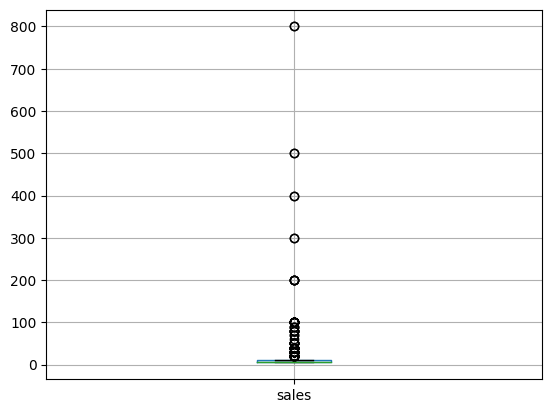

In [ ]:
df.boxplot(column='sales')

In [ ]:
# возьмем только ПК количество продаж которых выше 300 шт.
popular = df[df['sales'] > 300]

In [ ]:
# удалим не нужные параметры
popular = popular.drop(columns=['id', 'feedbacks', 'seller_rating', 'country', 'type_of_RAM', 'warranty_period'])

In [ ]:
popular = popular.drop(78)
popular

,title,price,sales,seller,video_processor,operating_system,processor_type,processor_cores,amount_of_RAM,storage_capacity_HDD,storage_capacity_SSD,width,depth,height,weight
22,игровой компьютер robotcomp аллигатор v2,32617,400,Robotcomp,amd radeon vega 7,windows 10 pro,amd ryzen 5,6.0,16.0,0.0,480.0,20.0,40.0,45.0,7.0
23,игровой компьютер robotcomp аллигатор v3,34017,500,Robotcomp,amd radeon vega 7,windows 10 pro,amd ryzen 5,6.0,16.0,0.0,480.0,20.0,40.0,45.0,7.0
64,игровой компьютер robotcomp старт v1,30760,500,Robotcomp,nvidia geforce gt 1030,windows пробная,intel core i3,4.0,8.0,0.0,480.0,20.0,42.0,46.0,7.0
554,игровой компьютер life tech bastion,25989,400,ABS-TECHNO.RU,nvidia geforce gt 1030,windows 10 pro,intel core i5,2.0,8.0,0.0,240.0,18.2,32.5,35.3,6.0
1246,игровой компьютер i7-2600 16gb ssd 512gb gt 73...,32900,800,ALFA-SYSTEM,nvidia geforce gt 730,windows,intel core i7,4.0,16.0,0.0,512.0,NaN,NaN,NaN,4.0


In [ ]:
print('Средняя цена популярных ПК:', round(popular['price'].mean()))

Средняя цена популярных ПК: 31257


Под индексом "78" мы не возьмем в анализ - по размерам похоже что этот ПК относится к Мини и продавца нет и вес маленький. Оценим оставшиеся компьютеры и как видим популярны те, кто входит в топ-13 продавцов.

Убраны были столбцы:
- 'id'- нам номер товара не нужен
- 'feedbacks' - количество отзывов не несут информации
- 'seller_rating' - рейтинг не нужен - не информативен
- 'country' - страна везде Россия
- 'type_of_RAM' - везде тип оперативной памяти DDR4
- 'warranty_period' - гарантийный период везде 3 года, что говорит о качестве и надежности данного продавца.

 Видим, что все ПК примерно одного среднего размера, как было замечено нами ранее, схожий по размеру в целом на рынке:
- ширина -20 см
- глубина - 39 см
- высота - 44 см
- вес - 7-8 кг.

Большинство ПК созданы для игр. Средняя цена у популярных компьютеров в районе 30 т.р. Опрерационная система одна из популярных на рынке - это "windows 10 pro" либо "windows пробная" (В различных версиях Windows есть "пробный период", т.е с момента установки проходит определенное количество времени, когда система настойчиво не просит ее активировать, как правило это обычно 30 дней во всех версиях Windows, начиная от Windows 7, заканчивая Windows 10. Исключения касаются только Windows 10 Корпоративная (в т.ч LTSC и LTSB версии) - у них ознакомительная версия 90 дней.).

Также Тип процессора в этих ПК стоят одни из топ-5, которые дешевле самых топовых: "amd ryzen 5", "intel core i3", "intel core i7". И количество ядер в данных ПК тоже стоят одни из топ-5 (не самые большие по объему-соответственно недорогие): "6", "4" и "2".

Объем накопителя в этих ПК стоит только типа SSD - более технологичный, но дороже, поэтому и объем у этих компьютеров не большой, входящий в топ-5 до 500 гб.

Видеопроцессор в них стоит из топ-10 для недорогого ПК.

**Вывод**: Мы выявили топ-13 продавцов, которые смогли продать компьютеров более 100 шт. И из них явными конкурентом становится "Robotcomp" (6600 проданных ПК) с большим разнообразием различных ПК и ценовым размахом от 20-200 т.р. То есть у него большой выбор-ассортимент "на любой вкус".

Мы оценили компьютеры, которые чеще всех остальных покупают (более 300 продаж), средняя цена их 32 т.р. Скорее всего эти "бюджетные" ПК берут для детей-подростков и их развлечений, а не для работы, где требуется больше памяти и процессор лучше, ядер больше. Ориентироваться только по этим параметрам и техническим характеристикам не стоит - так как есть потребители готовые отдать больше средств для получения более качественного и производительного ПК.

# Общий вывод

В этом проекте была проведена большая работа с данными.

Чтобы выполнить задачу поставленную заказчиком, мы сначало провели предобработку данных, а именно:
- выявили полные дубликаты (техническая ошибка системы) и убрали их, что составило 11% данных;
- обнаружили большое количество пропусков, которые оставили без изменения, так как заполнить их нет возможности, а убирать нельзя, иначе уйдет другая нужная нам информация;
- распаковали значения, закодированные в словарях и создали новые колонки с техническими и другими характеристиками, которые использовали в анализе;
- убрали данные не соответствующие тех.задаче: мини-пк и моноблоки, а также другой "мусор" не относящийся к нашему анализу. Тем самым мы убрали еще 16% данных.

После чистки и преобразования в нужный нам тип осталось 73% данных: 3300 строк и 21 столбец. Убрано было достаточно много, но это необходимо было для корректного дальнейшего анализа.

Посмотрели и провели анализ каждого признака, нашли популярные на рынке компьютеров технические и другие параметры, некоторые из которых влияют на стоимость ПК.

Посмотрели параметр цены ПК и выявили среднюю цену по рынку в 68 т.р. Есть выбросы, но убирать их мы не стали, так как считать их анамальными не можем-дорогие по цене могут быть ПК, тем более значение среднего и медианы совпадают.

Постоянными характеристиками для всех почти ПК являются (они не влияют на цену и популярность ПК):
1. габариты компьютеров:
- ширина - 16-25 см;
- глубина - 22-51 см;
- высота - 28-55 см;
- вес - 5-13 кг

Можно представить средний ПК: 20 шириной, 39 глубиной, 44 высотой, и весом 7-8 кг.
2. страна - Россия (так как сборка идет в ней, хоть и компоненты почти все иностранные)
3. гарантийный срок - 1-3 года. Этот показатель нужен для привлечения покупателей, чтобы они были уверены в качестве ПК, на стоимость влияния нет.
3. тип процессора - DDR4 -четвёртое поколение оперативной памяти, являющееся эволюционным развитием предыдущих поколений DDR.

Выявили характеристики компьютера, которые могут влиять на стоимость ПК и у некоторых выявлены лидеры - ТОПы - популярные на рынке, итак:
1. Есть 2 типа накопителя: HDD - есть у 30% ПК и SSD - есть у 95% ПК. При это второй более техничен и удобен, он соответствует современным требованиям и более дороже первого. По этой причине HDD всегда ставится со вторым - для тех кто хочет больше памяти и дешевле по цене, не отставая от современных "реалиев". Выявили зависимсость цены от типа и объема накопителя:
- SSD дороже
- чем больше объем тем дороже ПК. Топ по объему: для HDD 1000 гб., для SSD 480 и 1000 гб.

2. Более 60 % компьютеров имеют оперативную память 16 гб., затем 23% - 32 гб. Популярными можем считать эти два объема. Зависимости явной цены от этого параметра нет, но при увеличении объема размах в стоимости становится больше.

3. Мы нашли топ-5 типов процессора и среди них по популярности выделяется Intel Core i5 — позиционируется как семейство процессоров среднего уровня цены и производительности, между более дешёвым Intel Core i3 и более дорогим Core i7.

4. Мы нашли топ-5 по количеству ядер, среди них лидирует "6" и "4" ядра. Чем болше количество ядер процессора, тем выше его цена, т.е. зависимсоть прослеживается.

5. Выявили топ-5 операционных систем, среди которых более выделяются "windows 10 pro" и "windows 11 pro". Последняя версия дороже предыдущей - связь с ценой есть. Производители в большинстве своем ориентируются на потребителей, которые преобретают ПК для работы и учебы, соответственно устанавливают более новый процессор, более современный. Производители ПК не хотят отставать от современных тенденций и новинок.

6. Выявили 3 компании-производителя видеопроцессоров: Nvidia, AMD, Intel. Наиболее популярна семейство графических процессоров компании Nvidia. Взаимосвязь с ценой прослеживается - чем дороже видеопроцессор, тем дороже ПК. Наиболее популярны на рынке "nvidia geforce rtx 3060" и "nvidia geforce rtx 3050", их чаще устанавливают производители, они соответствуют современным тенденциям и принципу "цена-качество".

7. Мы выявили топ-13 продавцов, которые смогли продать компьютеров более 100 шт. И из них явными конкурентом становится "Robotcomp" (6600 проданных ПК) с большим разнообразием различных ПК и ценовым размахом от 20-200 т.р. То есть у него большой выбор и ассортимент "на любой вкус".

Мы оценили компьютеры, которые чаще всех остальных покупают, т.е. компьютеры имеющие наибольшую популярность - их продажи превышают 300 шт - это недорогие в районе 32 т.р., с небольшой памятью SSD - 240-480гб., опрерационной системой - "windows 10 pro", либо "windows пробная", типом процессора - "amd ryzen 5",  "intel core i3", "intel core i7",  количеством ядер "6", "4" или "2", объемом оперативной памяти - "8" или "16"гб, видеопроцессором из топ-10 для недорого компьютера. Скорее всего эти "бюджетные" ПК берут для детей-подростков и их развлечений, а не для работы, где требуется больше памяти и процессор лучше, ядер больше, видеопроцессор дороже и техничнее. Ориентироваться только по этим параметрам и техническим характеристикам не стоит - так как есть потребители готовые отдать больше средств для получения более качественного и производительного ПК.

**Вывод и рекомендации**: Мы нашли технические характеристики влияющие на стоимость компьютера и какие популярны среди них на рынке (нашли ТОПы по каждому признаку). Собрать ПК можно на любой "вкус": для работы, учебы, развлечения. Можно укомплектовать ПК под разные запросы и стоимость его будет варьироваться от качества и какого поколения установлена "деталь" или программа. Можно охватить широкий круг потребителей, как это сделал продавец "Robotcomp" или ориентироваться на определенную категорию потребителей, или делать такие же популярные как это делают "конкуренты" - недорогие ПК в районе 32 т.р., или ориентироваться на средний по рынку и собирать ПК в районе 68 т.р., или дорогие ПК собирать для более платежеспособных покупателей. Рекомендуется выбрать стратегию развития, прежде чем выходить на новую площадку.










In [ ]:
df.to_csv('final_task.csv', index = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3300 non-null   int64  
 1   title                 3300 non-null   object 
 2   price                 3300 non-null   int64  
 3   sales                 765 non-null    Int64  
 4   feedbacks             3300 non-null   Int64  
 5   seller                3224 non-null   object 
 6   seller_rating         3223 non-null   float64
 7   video_processor       3300 non-null   object 
 8   operating_system      3300 non-null   object 
 9   warranty_period       1973 non-null   float64
 10  country               1756 non-null   object 
 11  processor_type        3079 non-null   object 
 12  processor_cores       3159 non-null   float64
 13  type_of_RAM           3300 non-null   object 
 14  amount_of_RAM         3163 non-null   float64
 15  storage_capacity_HDD 